<a href="https://colab.research.google.com/github/BrunoMinetti/BootcampAluraDataScienceAplicada2021/blob/main/Bruno_Sanches_ProjetoM%C3%B3dulo02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analisando dados do programa de imunização nacional tendo como indicadores de caso os dados de "IMUNIZAÇÕES - COBERTURA - BRASIL" do DATASUS**
---
Autor: Bruno Cesar Minetti Sanches<p>
GitHub: https://github.com/BrunoMinetti<p>
Linkedin: https://www.linkedin.com/in/brunocmsanches/<p>

---
###Breve currículo:<p> 
Gestor de Trânsito | Tecnólogo em Microeletrônica | Estudante de Análise e Desenvolvimento de Sistemas

In [1]:
%%html
<marquee direction="down" width="500" height="200" behavior="alternate" style="border:solid">
  <marquee behavior="alternate">
    <font size='6' face='Tahoma' color='#31c520'>Bem-vindos ao meu projeto</font>
  </marquee>
</marquee>

## Resumo:
---
Em decorrência de forte onda de desinformação, algumas doenças consideradas erradicadas voltaram aos noticiários, como a [Agência Brasil](https://agenciabrasil.ebc.com.br/saude/noticia/2018-07/saiba-quais-doencas-voltaram-ameacar-o-brasil) aponta, cobertura vacinal vem entrando em queda desde 2016, em alguns estados como Rio de Janeiro, Amazonas, Roraima, Rio Grande do Sul confirmaram casos de Sarampo.<p>
Para aprofundar meu estudo decidi pegar os 20 últimos anos, de 2000 a 2019, para ter uma boa base de dados e facilitar a visualização das tendências, verifiquei que os dados apresentados são anuais, então bases menores provavelmente não trariam resultados satisfatórios.<p>
Por orientação do Thiago Gonçalves e do Átila Iamarino no meu primeiro projeto, decidi tentar iniciar minha pesquisa de modo mais objetivo, menos genérico e focar meu estudo no estados do sudeste, Rio de Janeiro, Minas Gerais e São Paulo e Espírito Santo.<p>
Conversei também com minha irmã Fernanda, que atua na área da saúde, como técnica de enfermagem, e tem o conhecimento adquirido com a vivência de campo, além de ser veterinária (pequena pausa para sentir orgulho dela), que me indicou três doenças com fortes indícios de regresso, Febre Amarela, Sarampo e Poliomielite, essa última, tem um caráter especial, pois minha tia Vera teve na infância, o que acabou acarretando em dificuldades ao longo de sua vida toda.<p>
**Fonte:**<p>
- https://agenciabrasil.ebc.com.br/saude/noticia/2018-07/saiba-quais-doencas-voltaram-ameacar-o-brasil<p>
- https://www.paho.org/bra/index.php?option=com_content&view=article&id=6232:oms-e-unicef-alertam-para-declinio-na-vacinacao-durante-pandemia-de-covid-19&Itemid=820<p>
- https://agenciabrasil.ebc.com.br/saude/noticia/2020-10/em-queda-ha-5-anos-coberturas-vacinais-preocupam-ministerio-da-saude<p>

## Opções Técnicas:
---
>Nesse trabalho optei em persistir meus dados no GitHub para facilitar o acesso e também para estudar essa opção, visto que persistindo no Drive é sempre necessário autorizar a montagem do diretório.

>Separei os dados por estados, já na extração, vou fazer a análise considerando tanto a evolução pela quantidade de doses, como a taxa de coberturas vacinais, pois em alguns casos o volume de vacinas administradas podem evoluir, mas a taxa irá apontar se o volume aplicado foi eficiente, ou não.<p>
Existem muitos fatores que vão mudando ao longo do tempo, como a quantidade de crianças que nasceram no período, situações epidêmicas, que pode estimular a vacinação, assim como as campanhas de vacinação, ainda podem haver também outros fatores socioeconômicos que afetam a taxa de imunização.

>Estou considerando no meu cáculo 20 anos, esse valor pode ser alterado dependendo da amostra, mas acredito que retornará valores interessantes para análise.

>Criarei funções para melhorar a padronização e facilitar a criação dos meus data frames.
Essas funções já definem o index, define os valores NaN como zero, apenas para permitir a plotagem dos gráficos, também convertem os valores das colunas em datetime.data, assim fica melhor para definirmos período e utilizarmos funções de tempo caso seja necessário.

>Criarei também funções para plotagem dos gráficos, pois ajuda a manter um estilo mais uniforme, o que acarreta numa melhor visualização dos dados.

>Para finalizar as conclusões, vou extrair os dados de alguma outra fonte, que traga uma variação mais generalista dos dados, para verificar se as tendências apontadas no meu estudo se confirmam.

### Bibliotecas:
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime
from datetime import date
import seaborn as sns

### Funções, listas e ferramentas:
---

In [3]:
# Divisão dos grupos imuno, que serão analisados.
imuno = ['074 Poliomielite',
 '100 Poliomielite 4 anos',
 '006 Febre Amarela',
 '021 Tríplice Viral  D1',
 '098 Tríplice Viral  D2',
 '097 Tetra Viral(SRC+VZ)',
 '018 Sarampo']
poliomielite = ['074 Poliomielite', '100 Poliomielite 4 anos']
febre_amarela = ['006 Febre Amarela']
sarampo = ['021 Tríplice Viral  D1', 
           '098 Tríplice Viral  D2', 
           '097 Tetra Viral(SRC+VZ)', 
           '018 Sarampo']

imuno

['074 Poliomielite',
 '100 Poliomielite 4 anos',
 '006 Febre Amarela',
 '021 Tríplice Viral  D1',
 '098 Tríplice Viral  D2',
 '097 Tetra Viral(SRC+VZ)',
 '018 Sarampo']

In [4]:
imuno_lista = ['febre_amarela','poliomielite', 'sarampo']

In [5]:
estados = ['ES','MG','RJ','SP']

In [6]:
def converte_ano(ano):
    return datetime.date(int(ano),1,1)

In [7]:
def soma_poliomielite_estados(df):
    df.loc['poliomielite'] = df.loc[poliomielite].sum()

def soma_sarampo_estados(df):
    df.loc['sarampo'] = df.loc[sarampo].sum()

def soma_febre_amarela(df):
    df.loc['febre_amarela'] = df.loc[febre_amarela].sum()

In [8]:
#Função para criação de data frame com a quantidade de doses aplicadas em cada estado.
def cria_df_doses_estado(estado_sigla):
    doses_estado = pd.read_csv(f'https://raw.githubusercontent.com/BrunoMinetti/BootcampAluraDataScienceAplicada2021/main/DADOS/Doses_{estado_sigla}_2000-2019.csv',\
                                   encoding = 'ISO-8859-1', na_values = '-', skiprows=5, skipfooter= 17,decimal =',', sep = ';')
    doses_estado = doses_estado.replace(np.nan, 0)

    doses_estado = doses_estado.set_index('Imuno')
    #doses_estado.columns = doses_estado.columns.map(converte_ano)
    soma_febre_amarela(doses_estado)
    soma_poliomielite_estados(doses_estado)
    soma_sarampo_estados(doses_estado)
  
    return doses_estado
                       
def imuno_doses(doses_estado):
    return doses_estado.loc[imuno_lista]

In [9]:
#Função para criação de data frame com a taxa de doses aplicadas em cada estado.
def cria_df_taxa_estado(estado_sigla):
    doses_estado = pd.read_csv(f'https://raw.githubusercontent.com/BrunoMinetti/BootcampAluraDataScienceAplicada2021/main/DADOS/TX_{estado_sigla}_2000-2019.csv',\
                                   encoding = 'ISO-8859-1', na_values = '...', skiprows=5,decimal =',', sep = ';')
    doses_estado = doses_estado.replace(np.nan, 0)
    doses_estado = doses_estado.set_index('Imuno')
    #doses_estado.columns = doses_estado.columns.map(converte_ano)
    
    return doses_estado

### Dados compilados de DATASUS  Tecnologia da Informação a Serviço do SUS:
---
>- DATASUS: http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def <p>
- Classificação CID 10 de doenças -  https://icd.who.int/browse10/2019/en#/I <p>
- Classificação oficial OMS no DATASUS: http://www.datasus.gov.br/cid10/v2008/cid10.htm (PÁGINA SE ENCONTRA FORA DO AR).
- Imunizações - Cobertura – desde 1994 - Notas Técnicas: http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf
- Calendário Básico de Vacinação da Criança: http://pni.datasus.gov.br/calendario_vacina_Infantil.asp
Nota técnica - Taxas de abandono - http://tabnet.datasus.gov.br/cgi/pni/notatecnicaTx.pdf
- Cobertura de vacinas por imunobiológicos - Fundação ABRINQ - Observatório da Criança e do Adolescente - https://observatoriocrianca.org.br/cenario-infancia/temas/sobrevivencia-infantil-infancia/637-cobertura-de-vacinas-por-imunobiologicos?filters=1,2033
>
>**Filtros:**
+ Imunizações - Cobertura - Brasil, Doses Cáculos CV por Imuno e Ano, Unidade da Federação: Espírito Santo / Minas Gerais / Rio de Janeiro / São Paulo, Imuno: 074 Poliomielite, 100 Poliomielite 4 anos, 006 Febre Amarela, 021 Tríplice Viral  D1, 098 Tríplice Viral  D2, 097 Tetra Viral(SRC+VZ), 018 Sarampo, Período:2000-2019 - Doses
+ Imunizações - Cobertura - Brasil, Coberturas Vacinais por Imuno e Ano, Unidade da Federação: Espírito Santo / Minas Gerais / Rio de Janeiro / São Paulo, Imuno: 074 Poliomielite, 100 Poliomielite 4 anos, 006 Febre Amarela, 021 Tríplice Viral  D1, 098 Tríplice Viral  D2, 097 Tetra Viral(SRC+VZ), 018 Sarampo, Período: 2000-2019 - Taxa de Cobertura Vacinal

#### Espírito Santo
___

In [10]:
doses_ES = cria_df_doses_estado('ES')
doses_ES

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Imuno,,,,,,,,,,,,,,,,,,,,
074 Poliomielite,63352.0,62695.0,63269.0,63836.0,59736.0,58792.0,57852.0,55593.0,54226.0,55226.0,53039.0,55711.0,54000.0,53171.0,53483.0,53760.0,50436.0,45940.0,48359.0,30209.0
100 Poliomielite 4 anos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.0,90.0,46.0
006 Febre Amarela,26845.0,12498.0,2272.0,3188.0,14189.0,18147.0,18729.0,18336.0,17389.0,5523.0,529.0,339.0,411.0,298.0,232.0,205.0,222.0,34644.0,39415.0,25827.0
021 Tríplice Viral D1,40128.0,58228.0,57680.0,69501.0,60660.0,57746.0,56270.0,53312.0,52034.0,52733.0,51316.0,53397.0,54072.0,56339.0,57811.0,53572.0,58927.0,49360.0,50938.0,34703.0
098 Tríplice Viral D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45039.0,51574.0,47317.0,44260.0,40901.0,42421.0,29498.0
097 Tetra Viral(SRC+VZ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21137.0,52007.0,46453.0,46054.0,8999.0,3848.0,782.0
018 Sarampo,60587.0,58372.0,55103.0,2023.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
febre_amarela,26845.0,12498.0,2272.0,3188.0,14189.0,18147.0,18729.0,18336.0,17389.0,5523.0,529.0,339.0,411.0,298.0,232.0,205.0,222.0,34644.0,39415.0,25827.0
poliomielite,63352.0,62695.0,63269.0,63836.0,59736.0,58792.0,57852.0,55593.0,54226.0,55226.0,53039.0,55711.0,54000.0,53171.0,53483.0,53760.0,50436.0,46056.0,48449.0,30255.0


In [11]:
taxa_ES = cria_df_taxa_estado('ES')
taxa_ES

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Imuno,,,,,,,,,,,,,,,,,,,,
074 Poliomielite,108.53,109.82,114.88,119.51,112.22,112.11,112.45,108.97,104.58,107.32,103.07,108.26,104.93,100.22,101.25,99.39,89.28,81.32,90.54,54.09
100 Poliomielite 4 anos,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.35,0.15
006 Febre Amarela,45.99,21.89,4.13,5.97,26.66,34.60,36.40,35.94,33.54,10.73,1.03,0.66,0.80,0.56,0.44,0.39,0.42,61.33,73.80,46.25
021 Tríplice Viral D1,68.74,99.75,101.04,126.19,113.96,110.12,109.37,104.49,100.36,102.47,99.72,103.76,105.07,106.19,109.44,99.04,104.31,87.38,95.37,62.14
098 Tríplice Viral D2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,84.89,97.63,87.48,78.35,72.40,79.43,52.82
097 Tetra Viral(SRC+VZ),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39.84,98.45,85.88,81.52,15.93,7.20,1.40
018 Sarampo,103.79,102.25,100.05,3.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### Minas Gerais
___

In [12]:
doses_MG = cria_df_doses_estado('MG')
doses_MG

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Imuno,,,,,,,,,,,,,,,,,,,,
074 Poliomielite,352352.0,316183.0,293564.0,284340.0,287340.0,292643.0,282084.0,273978.0,260047.0,265414.0,253366.0,260449.0,248823.0,268316.0,250745.0,251113.0,235424.0,230667.0,241515.0,150678.0
100 Poliomielite 4 anos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,109.0,104.0
006 Febre Amarela,153817.0,266468.0,221342.0,66125.0,239803.0,281407.0,272782.0,266681.0,252026.0,260595.0,241446.0,251089.0,246886.0,259636.0,218756.0,235287.0,229374.0,217734.0,236242.0,153038.0
021 Tríplice Viral D1,304194.0,323627.0,317671.0,337116.0,319842.0,297080.0,281500.0,283575.0,257779.0,266063.0,251626.0,254340.0,264627.0,281321.0,283759.0,258863.0,263798.0,249552.0,245300.0,171749.0
098 Tríplice Viral D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216983.0,227900.0,185820.0,235662.0,228478.0,214182.0,148458.0
097 Tetra Viral(SRC+VZ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101741.0,203689.0,170732.0,244848.0,48809.0,23648.0,1493.0
018 Sarampo,359654.0,323926.0,240688.0,3211.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
febre_amarela,153817.0,266468.0,221342.0,66125.0,239803.0,281407.0,272782.0,266681.0,252026.0,260595.0,241446.0,251089.0,246886.0,259636.0,218756.0,235287.0,229374.0,217734.0,236242.0,153038.0
poliomielite,352352.0,316183.0,293564.0,284340.0,287340.0,292643.0,282084.0,273978.0,260047.0,265414.0,253366.0,260449.0,248823.0,268316.0,250745.0,251113.0,235424.0,230724.0,241624.0,150782.0


In [13]:
taxa_MG = cria_df_taxa_estado('MG')
taxa_MG

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Imuno,,,,,,,,,,,,,,,,,,,,
074 Poliomielite,106.70,99.22,91.01,87.11,103.49,105.86,105.99,105.58,99.56,105.19,100.41,103.22,98.61,103.24,96.51,97.12,88.29,86.50,95.28,57.74
100 Poliomielite 4 anos,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.11,0.13,0.12
006 Febre Amarela,46.58,83.62,68.62,20.26,86.37,101.79,102.50,102.77,96.49,103.28,95.69,99.51,97.85,99.90,85.33,91.00,86.03,81.65,93.20,58.64
021 Tríplice Viral D1,92.70,101.89,98.80,103.62,115.20,107.46,105.77,109.28,98.69,105.45,99.72,100.80,104.88,108.25,109.22,100.11,98.93,93.59,96.77,65.82
098 Tríplice Viral D2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,83.49,87.72,71.87,88.38,85.68,84.50,56.89
097 Tetra Viral(SRC+VZ),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39.15,78.40,66.03,91.82,18.30,9.33,0.57
018 Sarampo,108.91,101.65,74.61,0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### Rio de Janeiro
___

In [14]:
doses_RJ = cria_df_doses_estado('RJ')
doses_RJ

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Imuno,,,,,,,,,,,,,,,,,,,,
074 Poliomielite,243444.0,227932.0,259159.0,258845.0,248893.0,265565.0,227051.0,243055.0,233739.0,236915.0,231439.0,242886.0,209790.0,220297.0,224814.0,239545.0,210018.0,207660.0,190527.0,72481.0
100 Poliomielite 4 anos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,262.0,210.0,11.0
006 Febre Amarela,13717.0,4087.0,882.0,1099.0,741.0,768.0,490.0,690.0,1621.0,950.0,765.0,717.0,849.0,2298.0,2255.0,1132.0,516.0,61171.0,101840.0,59057.0
021 Tríplice Viral D1,231596.0,235152.0,233172.0,265779.0,243591.0,240496.0,223060.0,218038.0,206007.0,209411.0,205694.0,232066.0,210452.0,238401.0,250650.0,235935.0,255170.0,230954.0,217554.0,87344.0
098 Tríplice Viral D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,147768.0,214926.0,200114.0,168551.0,165907.0,153222.0,65538.0
097 Tetra Viral(SRC+VZ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74995.0,215521.0,202650.0,172336.0,45933.0,19321.0,4727.0
018 Sarampo,262297.0,243061.0,228147.0,1764.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
febre_amarela,13717.0,4087.0,882.0,1099.0,741.0,768.0,490.0,690.0,1621.0,950.0,765.0,717.0,849.0,2298.0,2255.0,1132.0,516.0,61171.0,101840.0,59057.0
poliomielite,243444.0,227932.0,259159.0,258845.0,248893.0,265565.0,227051.0,243055.0,233739.0,236915.0,231439.0,242886.0,209790.0,220297.0,224814.0,239545.0,210018.0,207922.0,190737.0,72492.0


In [15]:
taxa_RJ = cria_df_taxa_estado('RJ')
taxa_RJ

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Imuno,,,,,,,,,,,,,,,,,,,,
074 Poliomielite,93.98,94.07,111.61,111.46,108.27,118.98,103.95,112.08,108.31,109.39,106.87,112.15,96.87,99.95,100.89,107.03,89.93,88.92,86.98,32.47
100 Poliomielite 4 anos,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.18,0.01
006 Febre Amarela,5.30,1.69,0.38,0.47,0.32,0.34,0.22,0.32,0.75,0.44,0.36,0.33,0.39,1.04,1.01,0.51,0.22,26.19,46.49,26.46
021 Tríplice Viral D1,89.41,90.78,96.23,114.46,105.97,107.75,102.12,100.54,95.46,96.69,94.98,107.16,97.18,108.16,112.48,105.42,109.26,98.90,99.31,39.13
098 Tríplice Viral D2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,67.04,96.45,89.41,72.17,71.04,69.95,29.36
097 Tetra Viral(SRC+VZ),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,34.03,96.72,90.55,73.79,19.67,8.82,2.12
018 Sarampo,101.26,100.32,98.25,0.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### São Paulo
___

In [16]:
doses_SP = cria_df_doses_estado('SP')
doses_SP

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Imuno,,,,,,,,,,,,,,,,,,,,
074 Poliomielite,702565.0,652826.0,597184.0,599889.0,606666.0,599478.0,602946.0,587266.0,581223.0,592976.0,578068.0,600168.0,577072.0,603850.0,590235.0,608995.0,524536.0,545593.0,546801.0,321065.0
100 Poliomielite 4 anos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3286.0,2722.0,415.0
006 Febre Amarela,58721.0,46493.0,54184.0,61521.0,62848.0,65079.0,69378.0,70366.0,80821.0,102804.0,114673.0,122354.0,122398.0,124820.0,120629.0,120323.0,115491.0,146452.0,353112.0,275801.0
021 Tríplice Viral D1,723392.0,721664.0,664127.0,746606.0,644411.0,632327.0,610527.0,596559.0,581728.0,593206.0,567951.0,600450.0,595663.0,630776.0,647565.0,598150.0,581581.0,570938.0,542486.0,368221.0
098 Tríplice Viral D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,462032.0,591245.0,564656.0,486323.0,545158.0,488599.0,316256.0
097 Tetra Viral(SRC+VZ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,229640.0,604720.0,578198.0,506596.0,134363.0,220883.0,148568.0
018 Sarampo,741685.0,676195.0,625130.0,20415.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
febre_amarela,58721.0,46493.0,54184.0,61521.0,62848.0,65079.0,69378.0,70366.0,80821.0,102804.0,114673.0,122354.0,122398.0,124820.0,120629.0,120323.0,115491.0,146452.0,353112.0,275801.0
poliomielite,702565.0,652826.0,597184.0,599889.0,606666.0,599478.0,602946.0,587266.0,581223.0,592976.0,578068.0,600168.0,577072.0,603850.0,590235.0,608995.0,524536.0,548879.0,549523.0,321480.0


In [17]:
taxa_SP = cria_df_taxa_estado('SP')
taxa_SP

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Imuno,,,,,,,,,,,,,,,,,,,,
074 Poliomielite,102.35,103.34,95.89,98.31,98.19,96.74,99.93,98.67,96.60,99.10,96.60,100.30,96.44,98.95,95.73,99.68,83.84,87.21,91.10,52.48
100 Poliomielite 4 anos,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.94,0.83,0.13
006 Febre Amarela,8.55,7.36,8.70,10.08,10.17,10.50,11.50,11.82,13.43,17.18,19.21,20.45,20.45,20.45,19.56,19.70,18.63,23.46,58.83,45.08
021 Tríplice Viral D1,105.38,105.13,105.13,119.88,104.30,102.04,101.19,100.23,96.68,99.13,94.91,100.34,99.54,103.37,105.02,97.91,92.96,91.26,90.38,60.19
098 Tríplice Viral D2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,75.71,95.89,92.43,77.73,87.14,81.41,51.69
097 Tetra Viral(SRC+VZ),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,37.63,98.07,94.64,80.97,21.48,36.80,24.28
018 Sarampo,108.05,107.04,100.37,3.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [18]:
cobertura1ano = doses_estado = pd.read_csv(f'https://raw.githubusercontent.com/BrunoMinetti/BootcampAluraDataScienceAplicada2021/main/DADOS/Cobertura%20de%20vacinas%20por%20imunobiol%C3%B3gicos_menos_de_um_ano.csv',\
                                   encoding = 'ISO-8859-1', na_values = '...', skiprows=3, skipfooter=2 ,decimal =',', sep = ';')
cobertura1ano = cobertura1ano.set_index('Localidade')
cobertura1ano.columns = cobertura1ano.columns.astype(int)
cobertura1ano = cobertura1ano.drop(columns=[1994,1995,1996,1997,1998,1999])
cobertura1ano

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Localidade,,,,,,,,,,,,,,,,,,,,,
Brasil,81.2,83.9,68.4,45.9,88.9,89.8,83.1,89.4,86.6,90.9,86.9,83.9,86.2,87.7,94.4,92.5,87.0,82.1,85.2,79.6,64.3
Minas Gerais,89.7,84.8,61.6,40.1,89.0,89.1,83.9,91.6,88.1,98.9,104.0,84.8,89.9,93.3,96.3,95.0,91.7,85.4,93.1,84.4,74.9
Espírito Santo,81.3,86.1,67.5,50.6,89.1,87.8,82.1,86.3,86.9,90.7,87.2,86.1,91.4,89.0,98.2,96.0,90.9,80.1,88.0,81.0,70.5
Rio de Janeiro,81.1,80.8,74.7,45.7,88.2,91.8,81.8,86.8,83.6,88.2,78.9,80.8,85.3,83.3,93.7,96.7,91.2,87.4,82.4,67.6,45.9
São Paulo,91.0,89.1,67.9,47.9,92.6,92.7,86.1,91.7,91.3,93.8,81.5,89.1,87.1,90.1,95.7,96.1,86.8,85.2,87.0,80.1,67.7


In [19]:
cobertura_total = doses_estado = pd.read_csv(f'https://raw.githubusercontent.com/BrunoMinetti/BootcampAluraDataScienceAplicada2021/main/DADOS/Cobertura%20de%20vacinas%20por%20imunobiol%C3%B3gicos_populacao_total.csv',\
                                   encoding = 'ISO-8859-1', na_values = '...', skiprows=3, skipfooter=2 ,decimal =',', sep = ';')
cobertura_total = cobertura_total.set_index('Localidade')
cobertura_total.columns = cobertura_total.columns.astype(int)
cobertura_total = cobertura_total.drop(columns=[1994,1995,1996,1997,1998,1999])
cobertura_total

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Localidade,,,,,,,,,,,,,,,,,,,,,
Brasil,76.5,79.9,76.1,73.0,80.0,76.7,75.8,76.7,73.9,76.2,74.4,85.3,77.3,73.3,86.3,95.1,50.4,72.9,77.1,73.4,58.4
Minas Gerais,79.7,90.3,75.1,69.4,77.7,77.7,76.9,77.3,74.7,78.0,80.9,87.4,82.7,80.0,90.2,100.3,57.6,76.3,84.7,77.9,68.1
Espírito Santo,79.4,80.8,78.1,77.7,80.8,78.6,77.4,76.6,75.2,75.9,74.7,88.4,79.7,72.3,91.0,98.4,51.2,73.3,81.0,75.3,65.8
Rio de Janeiro,75.2,75.0,74.7,71.5,75.2,75.3,71.9,71.9,69.2,71.4,67.5,83.9,73.7,68.1,84.1,96.1,48.0,77.3,72.7,61.2,41.7
São Paulo,76.2,76.5,73.3,71.3,74.0,72.4,71.6,70.9,69.7,72.5,70.4,85.0,77.3,73.4,88.2,98.6,45.9,73.0,78.8,74.5,61.2


### Funções para Plotagem de Gráficos:
--- 

In [20]:
AZUL='#478ee5'
VERDE='#51983b'
AMARELO='#ffff2b'
VERMELHO='#ff0025'
LARANJA='#ff8c00'

In [21]:
estados_sigla = {
    'ES':['Espirito Santo', doses_ES, taxa_ES],
    'MG':['Minas Gerais', doses_MG, taxa_MG],
    'RJ':['Rio de Janeiro', doses_RJ, taxa_RJ],
    'SP':['São Paulo', doses_SP, taxa_SP]
}

#### Plotagem por doses

In [22]:
def plot_total_doses(uf, doenca, cor_padrao='#228b22', color_bar=None):
    estado = estados_sigla[uf]
    COLOR = cor_padrao
    ax = (estado[1].T[doenca]/1000).plot(figsize=(20,10), kind='bar', color=color_bar)
    ax = plt.title(f"Imunização considerando as doses somadas para {doenca} em {estado[0]}", color=COLOR, fontsize=22)
    ax = plt.xticks(color = COLOR, rotation = 55, fontsize=16)
    ax = plt.yticks(color = COLOR, fontsize=16)
    ax = plt.xlabel('Anos', color = COLOR, labelpad= 18, fontsize = 20)
    ax = plt.ylabel('Doses (x1000)', color = COLOR, labelpad= 18, fontsize = 20)
    ax = plt.grid(axis='y', which='both', linestyle='--')
    ax = plt.show()

In [23]:
def plot_doses_comparativo_estados (doenca, cor_padrao='#228b22', color_bar=None):
    estado = estados_sigla[uf]
    COLOR = cor_padrao
    plt.figure(figsize=(20,8))
    ax = sns.lineplot(x = doses_ES.T.index ,y = doses_ES.T[doenca.lower()]/1000, label= f'{doenca} - Espírito Santo', color=AZUL)
    ax = sns.lineplot(x = doses_MG.T.index ,y = doses_MG.T[doenca.lower()]/1000, label= f'{doenca} - Minas Gerais', color=VERDE)
    ax = sns.lineplot(x = doses_RJ.T.index ,y = doses_RJ.T[doenca.lower()]/1000, label= f'{doenca} - Rio de Janeiro', color=LARANJA)
    ax = sns.lineplot(x = doses_SP.T.index ,y = doses_SP.T[doenca.lower()]/1000, label= f'{doenca} - São Paulo', color=VERMELHO)
    
    
    ax = plt.title(f"Comparação entre estados para imunização de {doenca} com as doses somadas", color=COLOR, fontsize=22)
    ax = plt.xticks(color = COLOR, rotation = 55, fontsize=16)
    ax = plt.yticks(color = COLOR, fontsize=16)
    ax = plt.xlabel('Anos', color = COLOR, labelpad= 18, fontsize = 20)
    ax = plt.ylabel('Doses (x1000)', color = COLOR, labelpad= 18, fontsize = 20) 
    ax = plt.grid(which='both', linestyle='--')
    ax = plt.legend(loc=(0.3,-0.3))
    ax = plt.show()


#### Plotagem pela taxa de cobertura

In [24]:
def plot_taxa_comparativo_estados_lista (doenca_lista, cor_padrao='#228b22'):
    estado = estados_sigla[uf]
    COLOR = cor_padrao
    plt.figure(figsize=(15,8))
    titulo = str(doenca_lista).strip("[]")
    for doenca in doenca_lista:
        ax = sns.lineplot(x = taxa_ES.T.index ,y = taxa_ES.T[doenca], label= f'{doenca} - Espírito Santo', color=AZUL)
    for doenca in doenca_lista:
        ax = sns.lineplot(x = taxa_MG.T.index ,y = taxa_MG.T[doenca], label= f'{doenca} - Minas Gerais', color=VERDE)
    for doenca in doenca_lista:
        ax = sns.lineplot(x = taxa_RJ.T.index ,y = taxa_RJ.T[doenca], label= f'{doenca} - Rio de Janeiro', color=LARANJA)
    for doenca in doenca_lista:
        ax = sns.lineplot(x = taxa_SP.T.index ,y = taxa_SP.T[doenca], label= f'{doenca} - São Paulo', color=VERMELHO)

    sns.color_palette("husl", 16)

    ax = plt.title(f'''Comparação entre Estados das Taxas de Imunização para as doenças:
    {titulo}
    ''', color=COLOR, fontsize=22)
    ax = plt.xticks(color = COLOR, rotation = 55, fontsize=16)
    ax = plt.yticks(np.arange(0,130,5), color = COLOR, fontsize=16)
    ax = plt.xlabel('Anos', color = COLOR, labelpad= 18, fontsize = 20)
    ax = plt.ylabel('Taxa (%)', color = COLOR, labelpad= 18, fontsize = 20) 
    ax = plt.grid(which='both', linestyle='--')
    ax = plt.legend(loc= 'right', bbox_to_anchor=(1.3, 0.5))
    ax = plt.show()

In [25]:
def plot_taxa_comparativo_estados (doenca, cor_padrao='#00a86b'):
    plt.figure(figsize=(20,8))
    COLOR = cor_padrao
    ax = sns.lineplot(x = taxa_ES.T.index ,y = taxa_ES.T[doenca], label= 'Espírito Santo', color=AZUL)
    ax = sns.lineplot(x = taxa_MG.T.index ,y = taxa_MG.T[doenca], label= 'Minas Gerais', color=VERDE)
    ax = sns.lineplot(x = taxa_RJ.T.index ,y = taxa_RJ.T[doenca], label= 'Rio de Janeiro', color=LARANJA)
    ax = sns.lineplot(x = taxa_SP.T.index ,y = taxa_SP.T[doenca], label= 'São Paulo', color=VERMELHO)
    ax = plt.title(f"Comparação entre Estados das Taxas de Imunização para {doenca}", color=COLOR, fontsize=22)
    ax = plt.xticks(color = COLOR, rotation = 55, fontsize=16)
    ax = plt.yticks(np.arange(0,130,5), color = COLOR, fontsize=16)
    ax = plt.xlabel('Anos', color = COLOR, labelpad= 18, fontsize = 20)
    ax = plt.ylabel('Taxa (%)', color = COLOR, labelpad= 18, fontsize = 20) 
    ax = plt.grid(which='both', linestyle='--')
    ax = plt.legend(loc=(0.3,-0.3))
    ax = plt.show()

## Análise dos dados:
---
Nessa abordagem escolhi três doenças que tem se comentado aumento nos quadros infecciosos, para melhorar a interpretação dos dados, optei em somar os valores de todas as vacinas que tem como objetivo combater o Sarampo, a Febre Amarela e a Poliomielite.<p>
A região escolhida foi a sudeste, analisando os dados de Espírito Santo, Minas Gerais, Rio de Janeiro e São Paulo, postados em ordem alfabética.<p>
O Período de análise é de 20 anos entre 2000 e 2019.

###Análise considerando os dados de aplicação de doses imunológicas para os quatro estados do sudeste:

#### - Gráficos de imunização para SARAMPO / FEBRE AMARELA / POLIOMIELITE considerando as doses aplicadas:

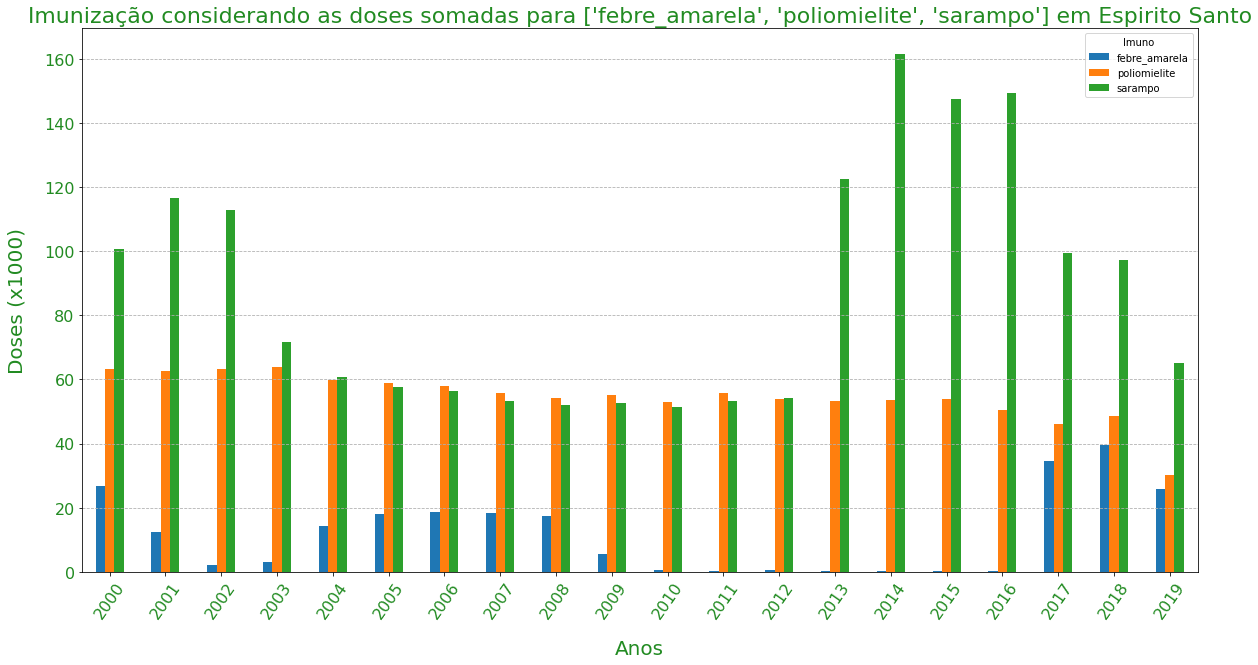

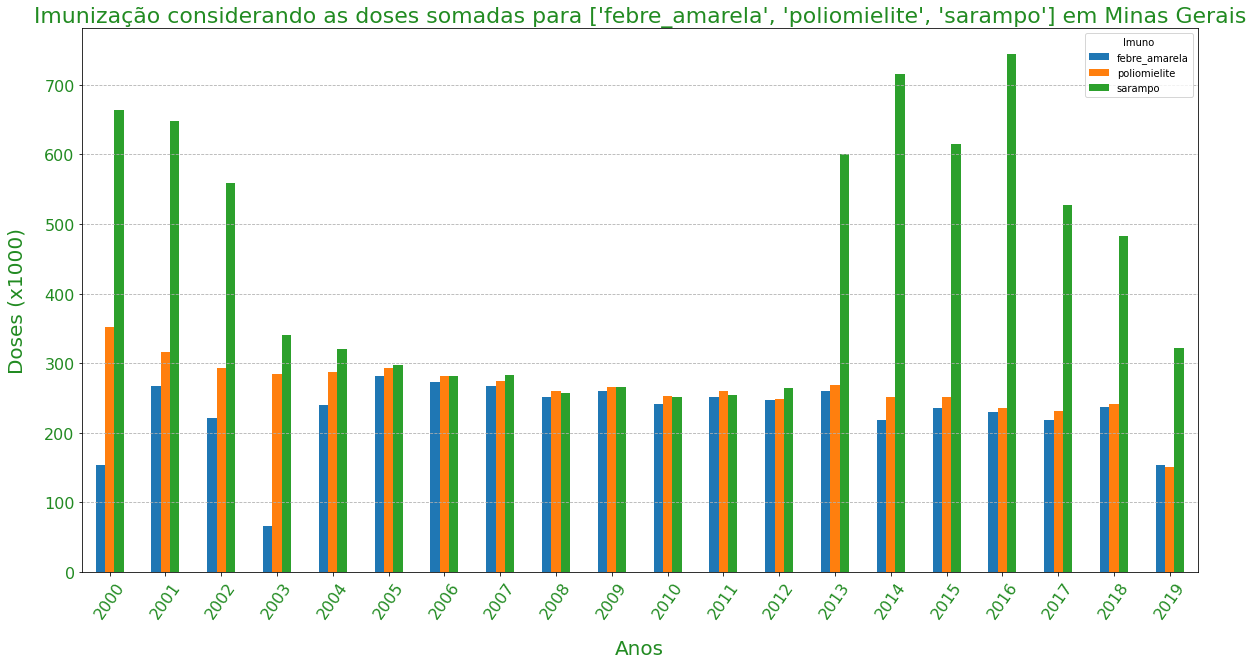

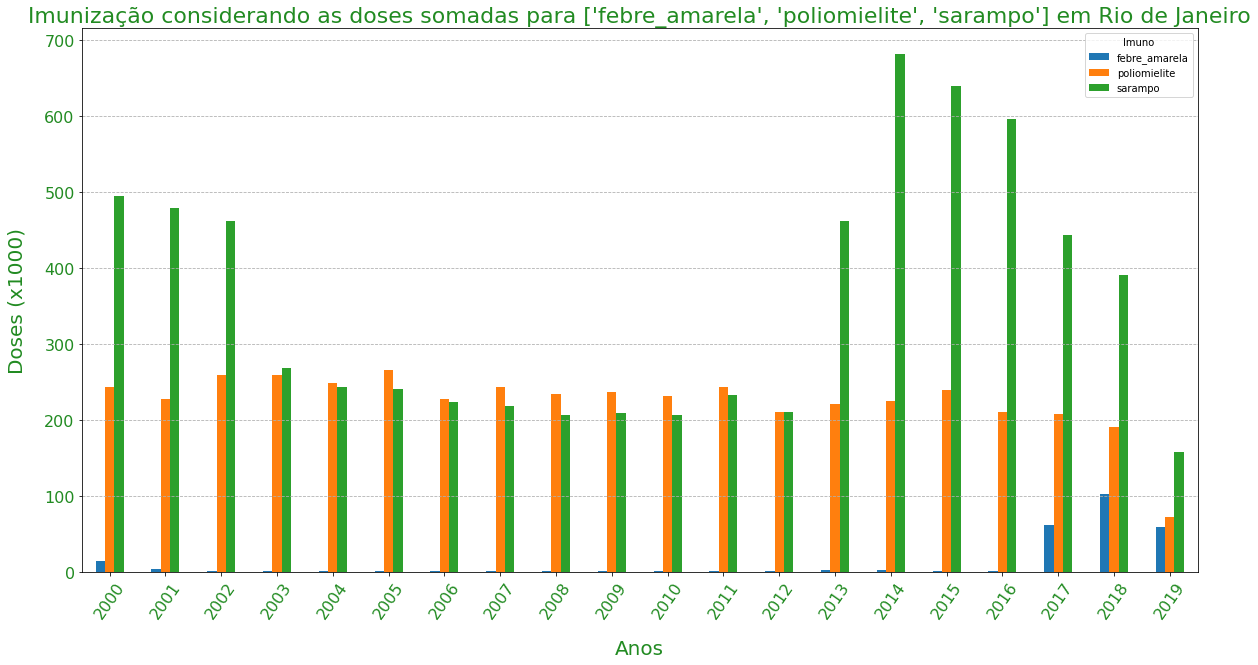

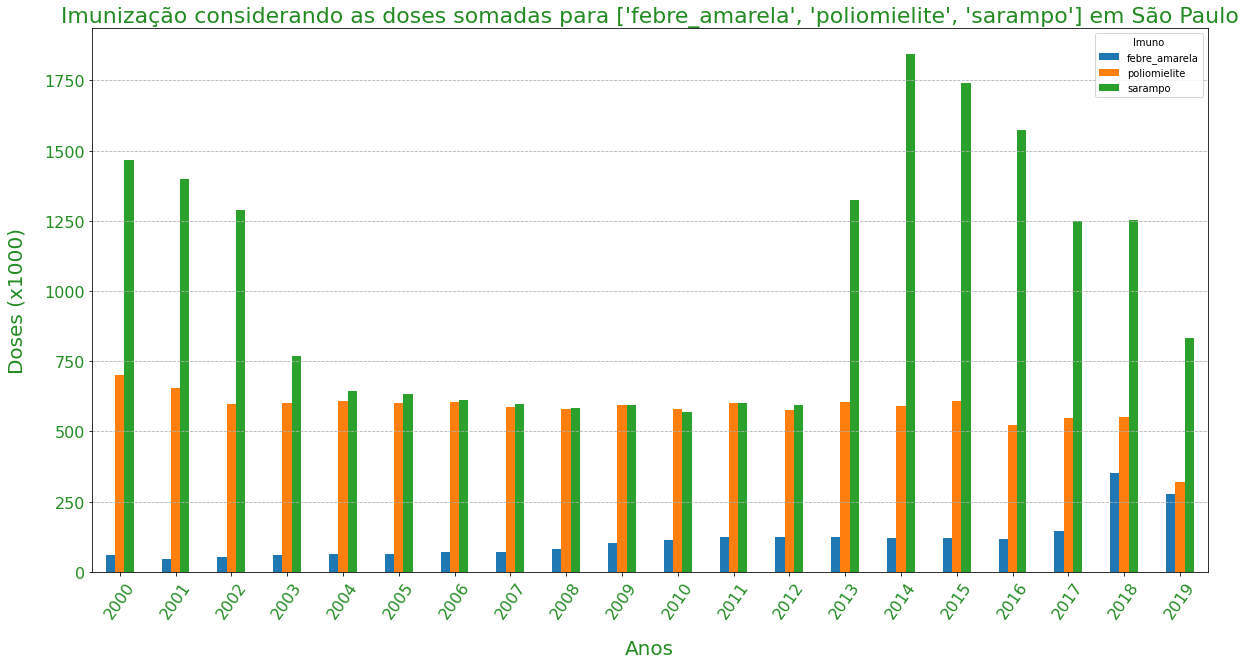

In [26]:
for uf in estados:
    plot_total_doses(uf, imuno_lista)

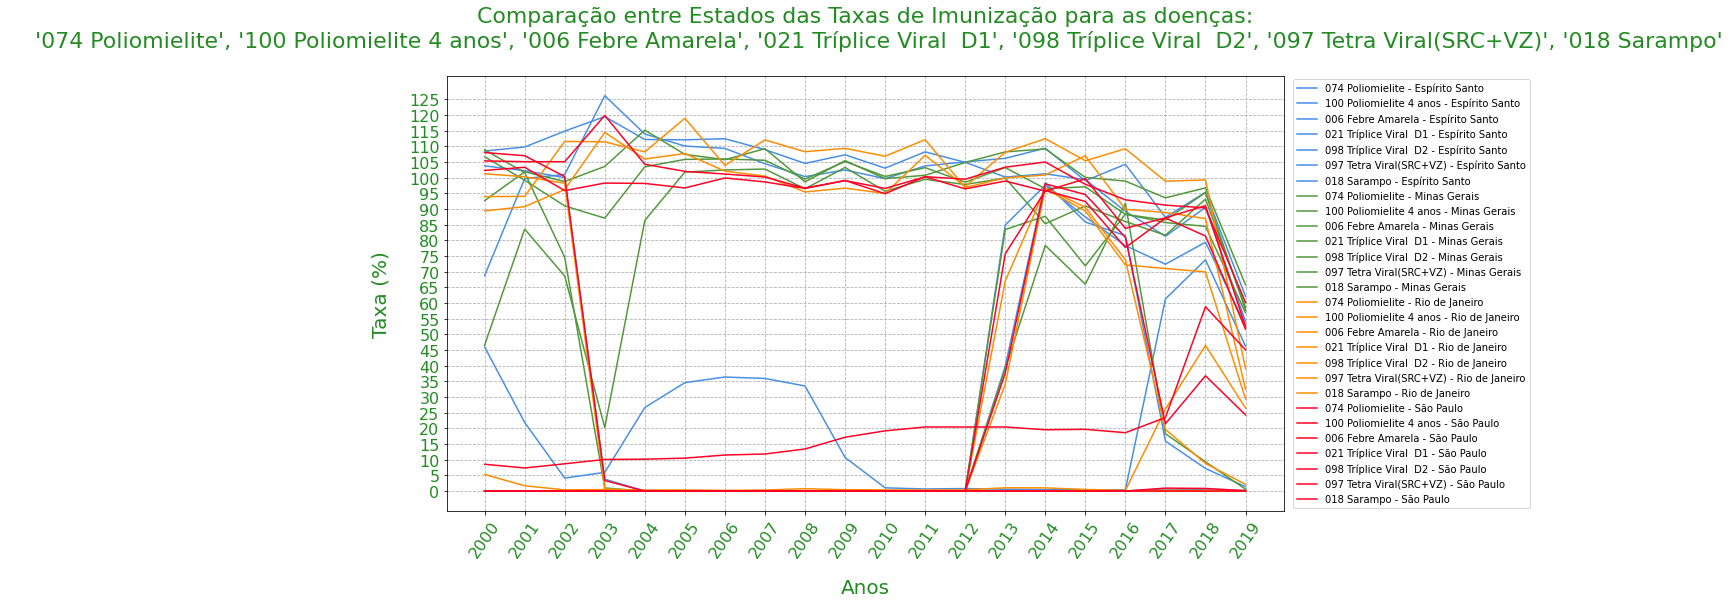

In [27]:
plot_taxa_comparativo_estados_lista(imuno)

---
Obeseração: os gráficos acima foram utilizados apenas para traçar uma linha de pensamento, seguem adiante separados por cada tipo de doença a ser imunizada e estado estudado.

#### - Gráficos de imunização para SARAMPO considerando as doses aplicadas:

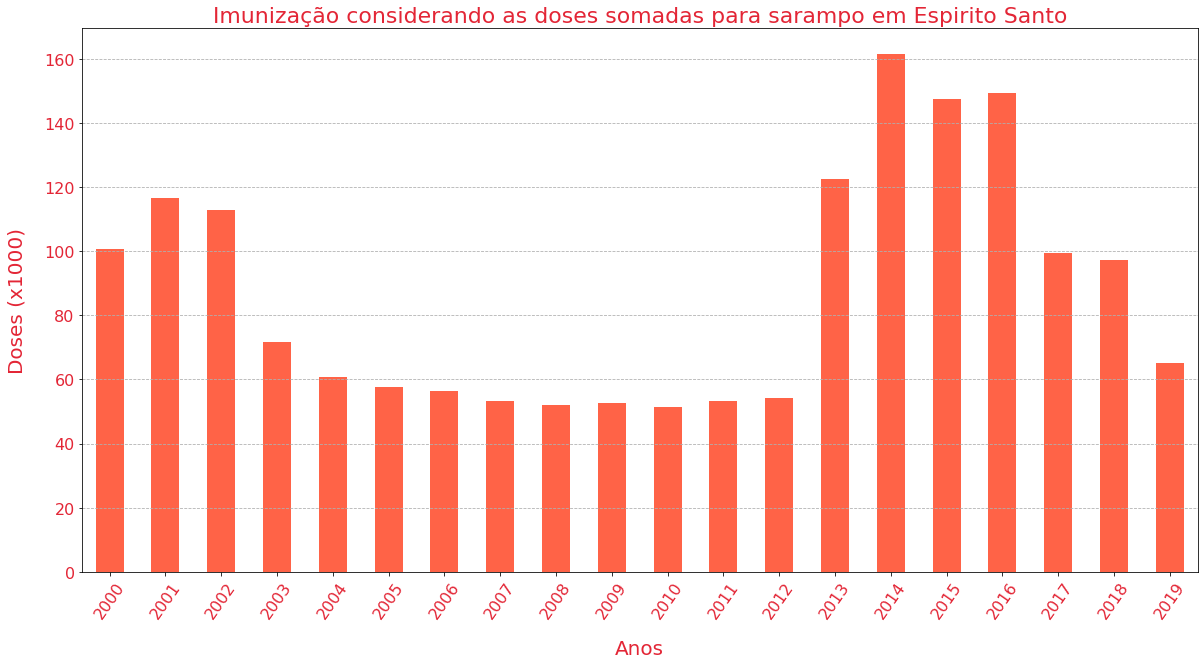

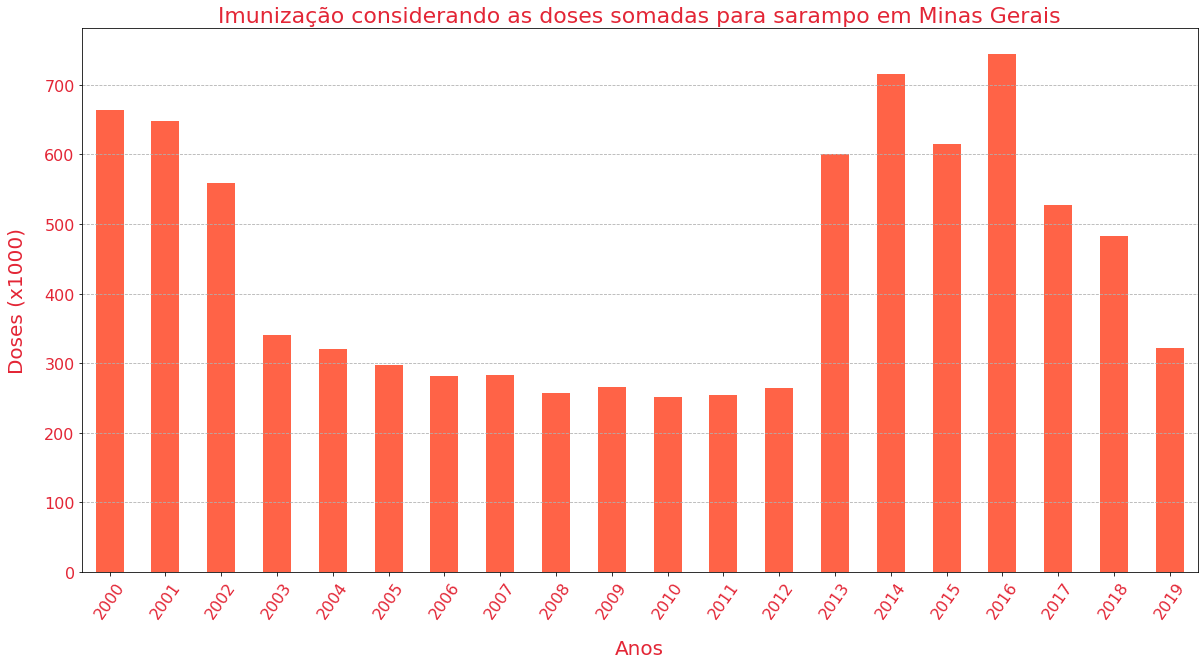

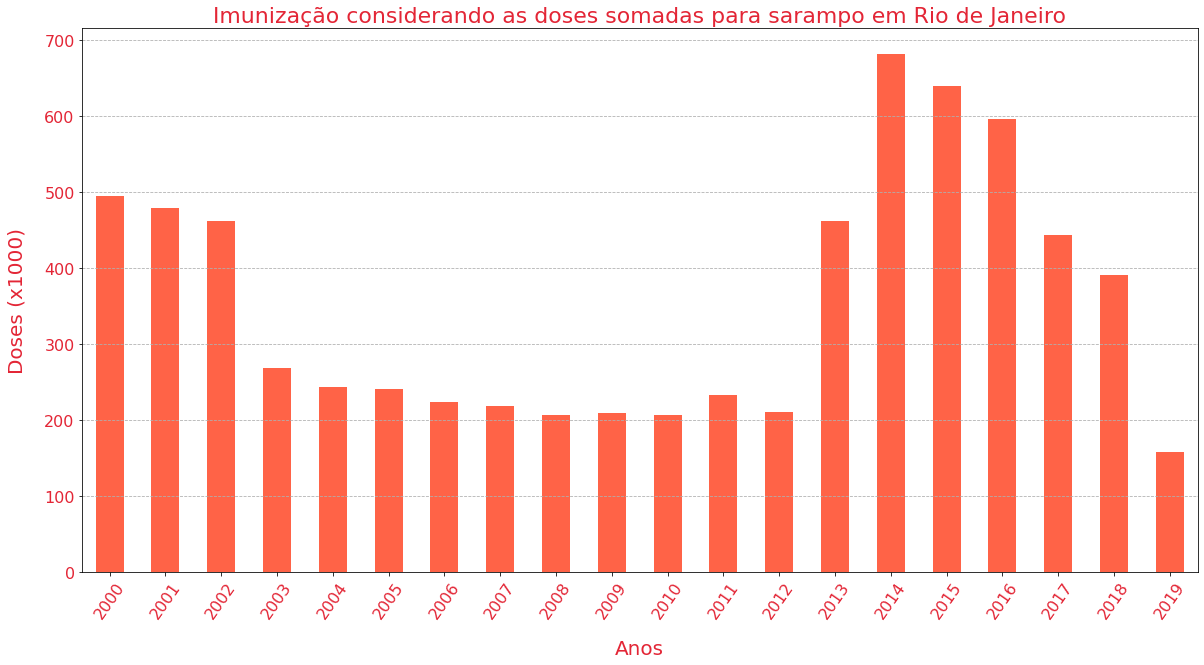

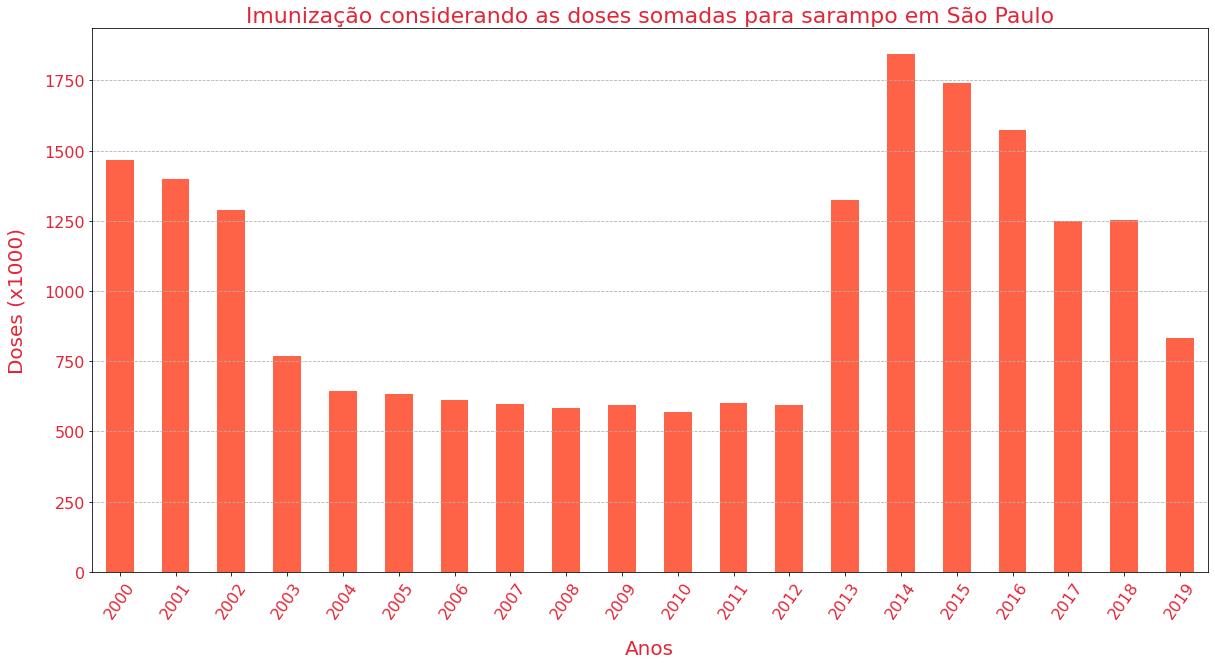

In [28]:
for uf in estados:
    plot_total_doses(uf, 'sarampo', '#e32636', '#ff6347')

#### - Gráfico de imunização para Sarampo com as doses somadas, comparativos entre os estados. 

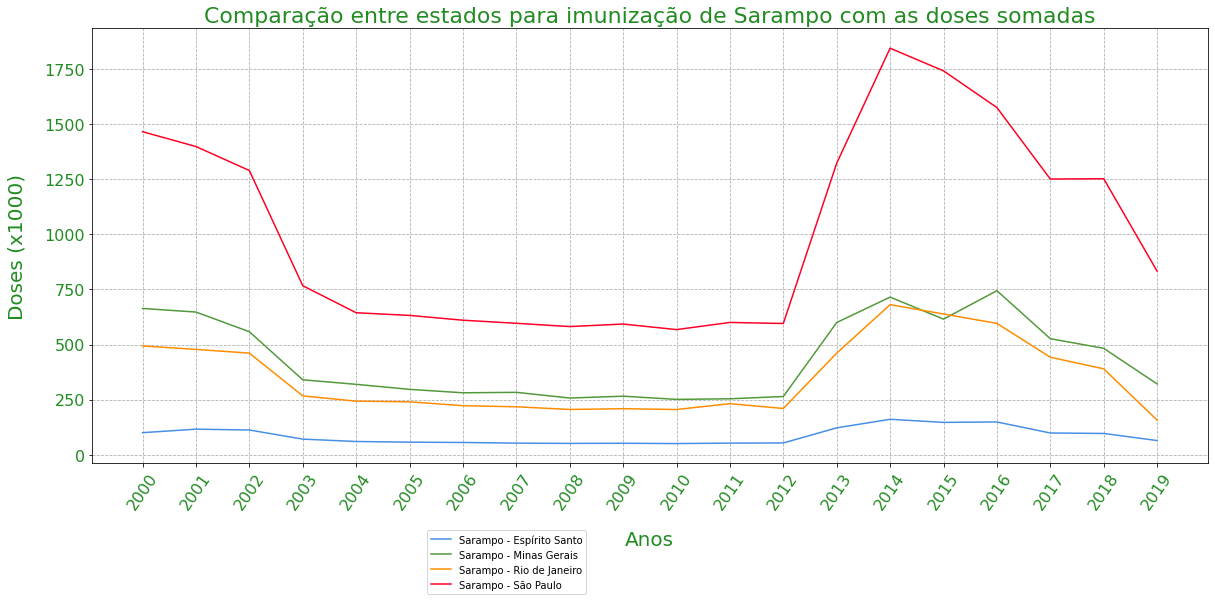

In [29]:
plot_doses_comparativo_estados('Sarampo')

#### - Gráfico de imunização para Sarampo considerando a taxa de cobertura, em comparação entre os estados. 


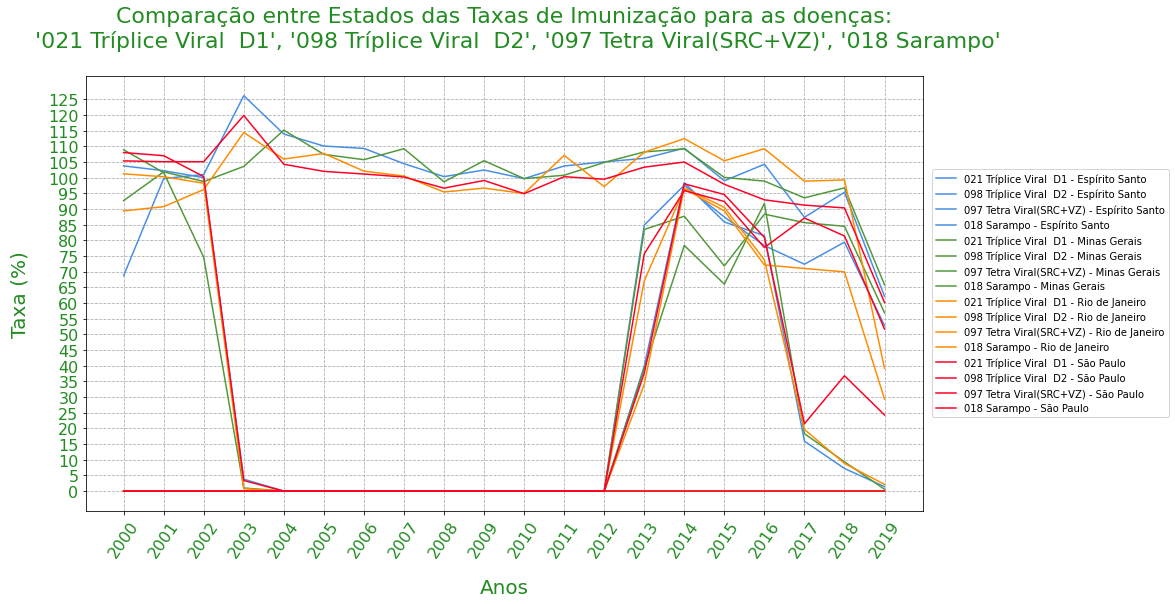

In [30]:
plot_taxa_comparativo_estados_lista(sarampo)

---
Como a imunização para sarampo conta com quatro tipos de vacinas, vou dividir a análise em quatro gráficos:

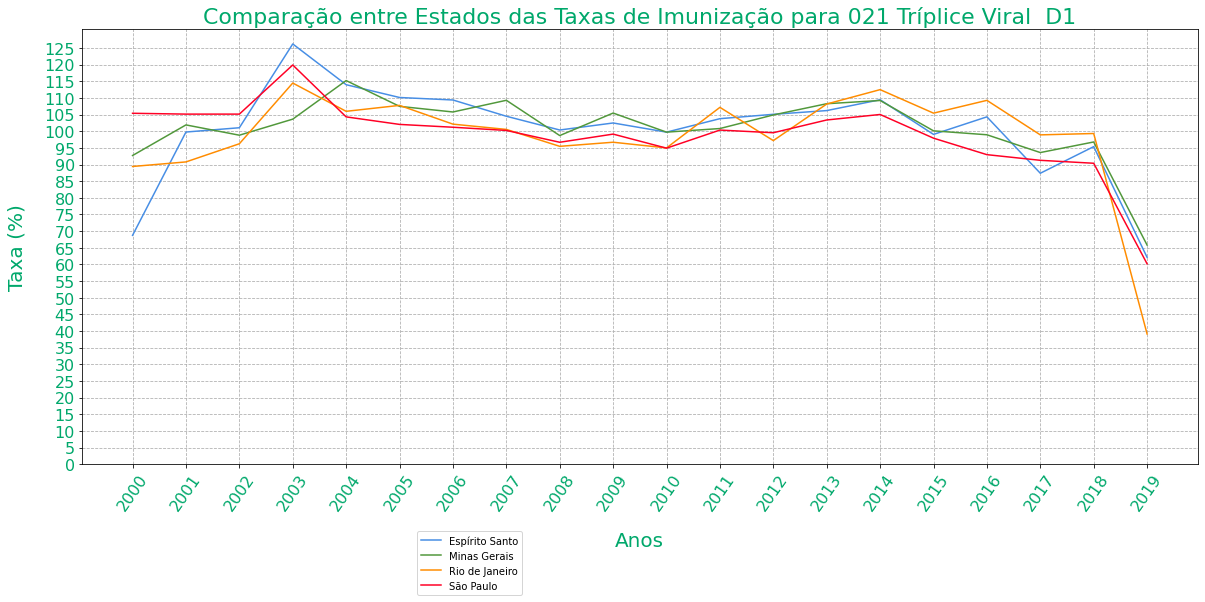

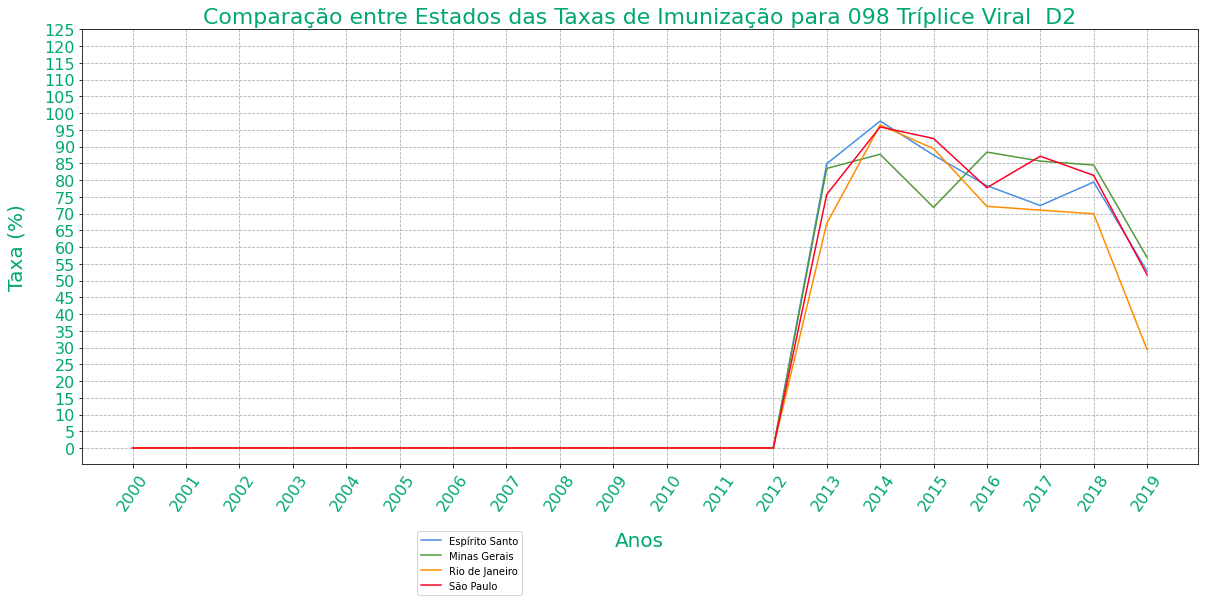

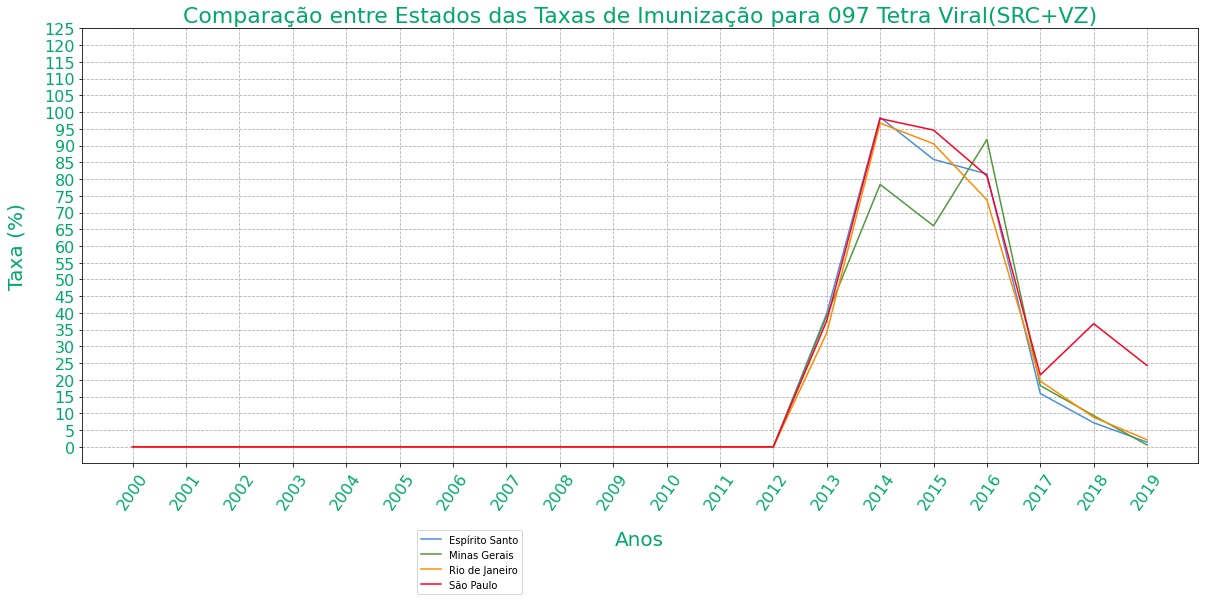

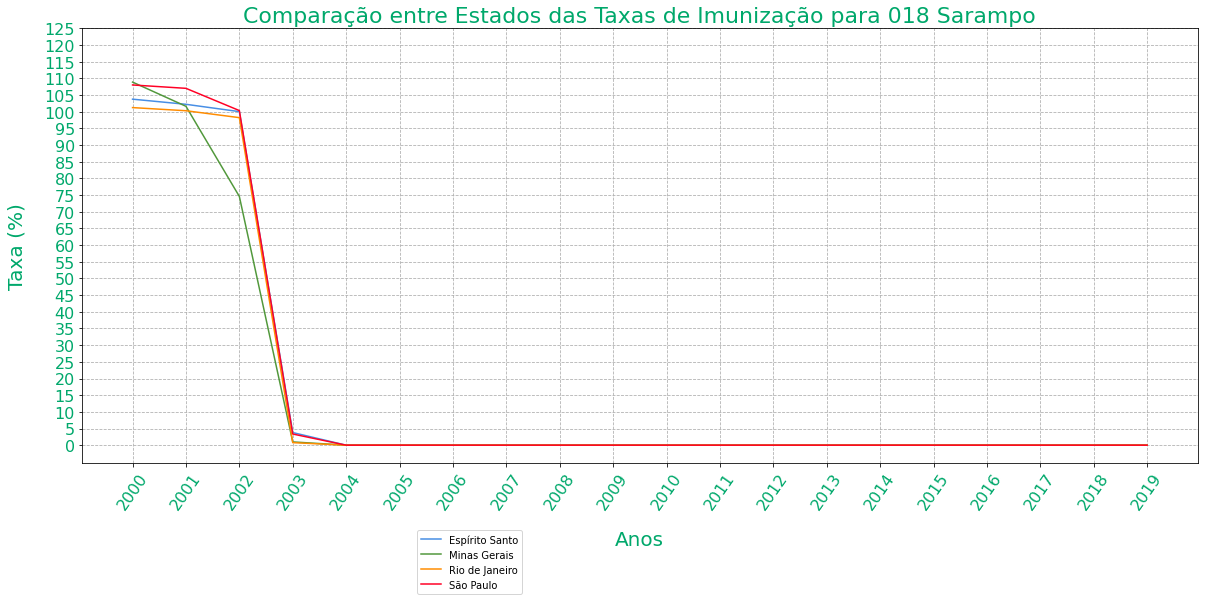

In [31]:
for doenca in sarampo:
    plot_taxa_comparativo_estados(doenca)

### Análise dos gráficos de imunização para SARAMPO:
>Para montar os gráficos de "Imunização considerando as doses somadas para SARAMPO" para analisar as vacinas de sarampo considerei as doses somadas das vacinas: '021 Tríplice Viral  D1', '098 Tríplice Viral  D2', '097 Tetra Viral(SRC+VZ)', '018 Sarampo'. Essas vacinas são combos, aplicadas em diferentes idades dos pacientes, mas todas tem o sarampo como uma das patologias abordadas.<p>
Analisando os dados, podemos verificar que no começo da série em 2000 até 2003, ocorreu forte [campanha de vacinação para sarampo](http://www.blog.saude.gov.br/index.php/servicos/32998-decadas-de-1990-e-2000-reforcam-sucesso-do-programa-nacional-de-imunizacoes), em todos os estados, pois a série começa com forte alta.<p>
Depois a serie se mantém estável entre 2003 e 2012, caindo um pouco a cada ano, onde podemos verificar que em todos os estados temos um incremento enorme nas doses aplicadas, efeito de [nova campanha nacional](https://agenciabrasil.ebc.com.br/geral/noticia/2014-10/vacinacao-contra-polio-e-sarampo-comeca-na-dia-8-de-novembro), pelo menos nos 4 estados analisados. Ainda podemos verificar que os dados vem caindo, apesar de verificarmos uma alta entre 2013 e 2016.<p>
Se analisarmos utilizando o gráfico de "Comparação entre estados para imunização de Sarampo com as doses somadas", notamos que, salvo as devidas proporções demográficas e populacionais, a distribuição de vacinas segue um padrão similar na região sudeste, o que provavelmente deve se estender pelo país, pois o esquema vacinal é uma atribuição do Ministério da Saúde, através do SUS.<p>
Os gráficos "Comparação entre Estados das Taxas de Imunização" no caso do Sarampo, acaba ficando um pouco mais complicado, mesmo dividindo em quatro gráficos, considerando os tipos de imunizante, é possível notar que o único que se mantém em toda série foi o '021 Tríplice Viral  D1', sendo recomendada aos 12 meses de vida, já a '098 Tríplice Viral  D2' é tida como um reforço e aplicada entre 04 e 06 anos.<p>
A '097 Tetra Viral(SRC+VZ)' consta nos dados, mas não localizei informação no calendário oficial, alguns sites informam que ela é uma vacina aplicada aos 15 meses de idade, previnindo as mesmas doenças da tríplice, sarampo, rubéola e caxumba, além da varicela.<p>
A vacina '018 Sarampo' foi aplicada entre 1994 e 2003, sendo substituída pela tríplice viral.
Então para facilitar o entendimento, quanto a eficiência vamos considerar apenas as vacinas '021 Tríplice Viral  D1', '098 Tríplice Viral  D2'.<p>
Os índices de vacinação para '021 Tríplice Viral  D1' são muito positivos, se mantendo acima de 95% em todas as séries, contudo podemos notar em todas queda em todos os estados a partir de 2018.<p>
O gráfico para '098 Tríplice Viral  D2' que oferece resultados para a segunda dose da Tríplice, ainda é muito interessante, com índices de imunização superiores a 70%, também apresentando a mesma queda, acredito que esses fatores seriam diferentes se não houvesse no mesmo período a oferta da vacina Tetra Viral, que pelo gráfico podemos notar que foi aplicada entre 2013 e 2017, esses valores devem influenciar uns aos outros.<p>
Se analisassemos os dados da '021 Tríplice Viral  D1' em relação ao da '098 Tríplice Viral  D2', poderíamos verificar a taxa de abandono, esse índice também pode ser coletado pelo TABNET.
<p>
**Fontes:**<p>
- http://www.blog.saude.gov.br/index.php/servicos/32998-decadas-de-1990-e-2000-reforcam-sucesso-do-programa-nacional-de-imunizacoes<p>
- https://agenciabrasil.ebc.com.br/geral/noticia/2014-10/vacinacao-contra-polio-e-sarampo-comeca-na-dia-8-de-novembro<p>


#### - Gráficos de imunização com as doses somadas - FEBRE AMARELA

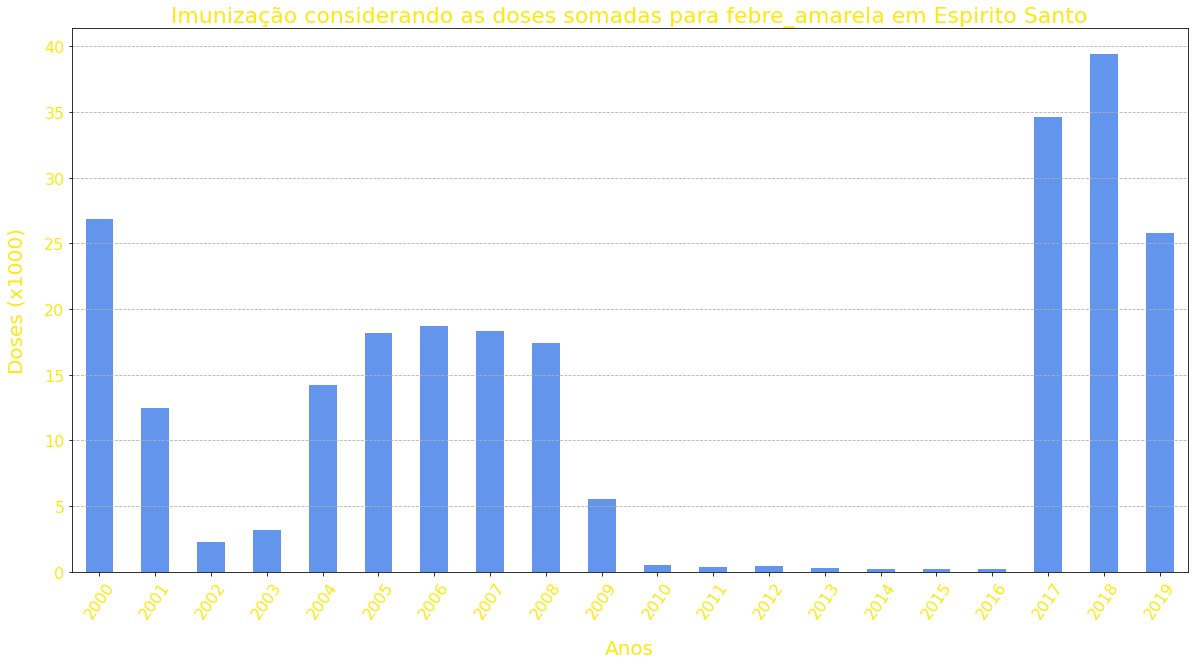

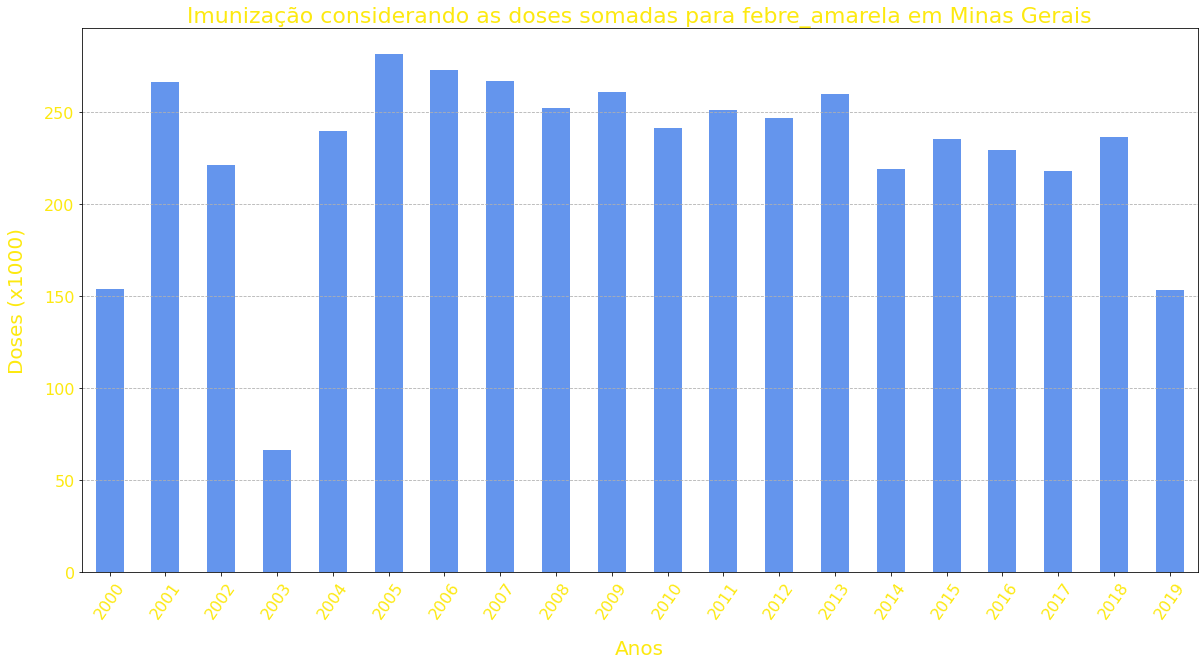

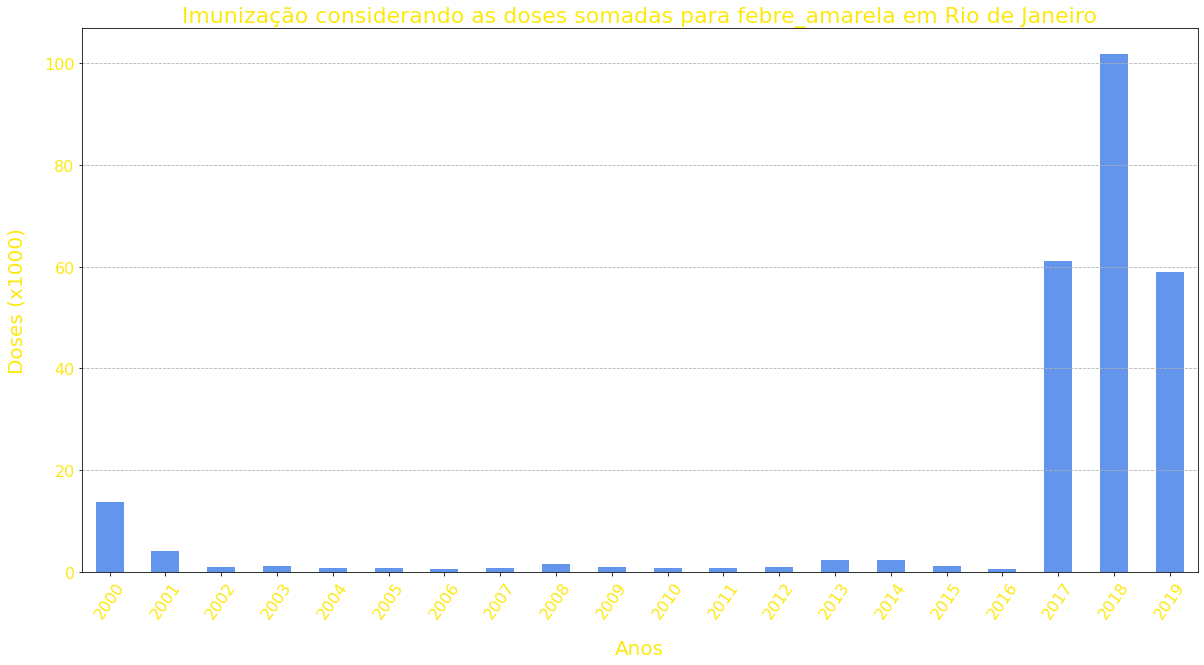

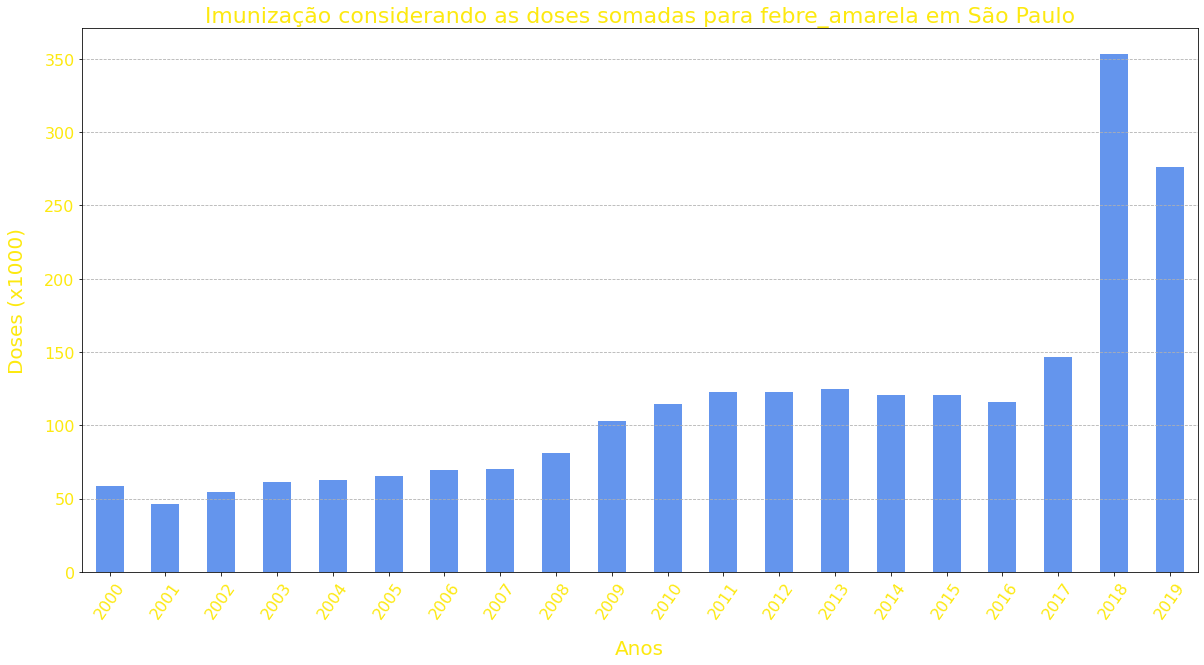

In [32]:
for uf in estados:
    plot_total_doses(uf, 'febre_amarela', '#fde910', '#6495ed')

#### - Gráfico de imunização para Febre Amarela com as doses somadas, comparativos entre os estados. 

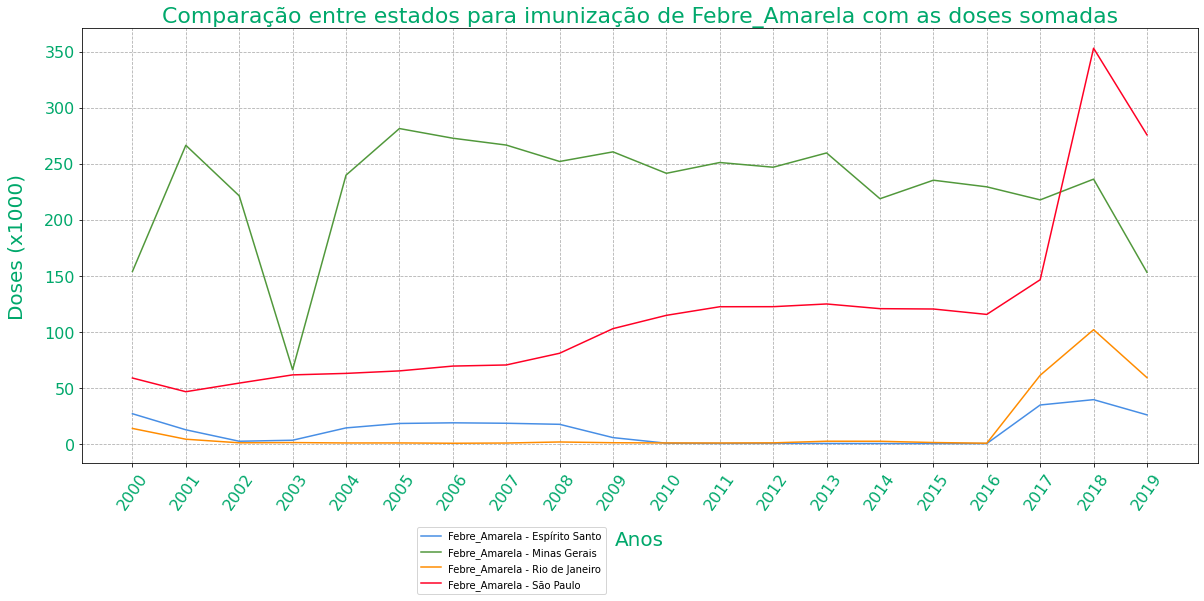

In [33]:
plot_doses_comparativo_estados('Febre_Amarela', '#00a86b')

#### - Gráfico de imunização para Febre Amarela considerando a taxa de cobertura, em comparação entre os estados. 

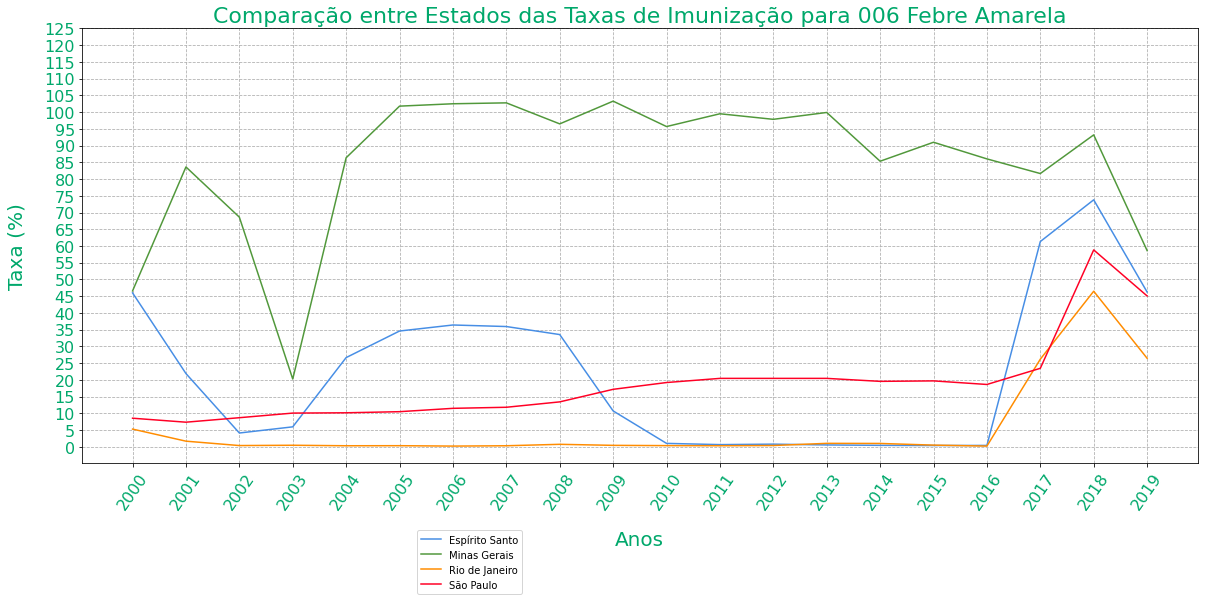

In [34]:
plot_taxa_comparativo_estados(febre_amarela[0], '#00a86b')

In [35]:
#Queda da distribuição de doses da vacina de Febre Amarela entre 2018 e 2019
f"{doses_SP.loc['febre_amarela'][-1]/doses_SP.loc['febre_amarela'][-2]*100:.0f}%"

'78%'

### Análise dos gráficos de imunização para FEBRE AMARELA:
>Como a Febre Amarela é considerado pelas autoridades sanitárias, uma doenção endêmica, ou seja, que se manifesta mais abrangentemente em determinadas regiões, a vacinação é indicada apenas em algumas regiões, sendo umas delas Minas Gerais.<p>
Analizando o grupo de gráficos de "Imunização considerando as doses somadas para febre_amarela", então, devemos em primeiro momento considerar, que Minas Gerais é um estado com vacinação regular, indicado conforme [Guia para Profissionais da Saúde - Febre Amarela](https://portalarquivos2.saude.gov.br/images/pdf/2018/janeiro/18/Guia-febre-amarela-2018.pdf) (pág. 25). Então nesse gráfico vemos um perfil mais regular, com oscilações aleatórias que não indicam tendências.<p>
Já no Rio de Janeiro e no Espirito Santo, vemos uma baixíssima cobertura vacianal, com a aplicação de poucas doses no período entre 2000 e 2016, abaixo de 20 mil doses anuais, e uma forte subida entre 2017 e 2019, fruto de uma [epidemia que tivemos no período](https://www.uol.com.br/vivabem/noticias/redacao/2020/10/06/epidemia-de-febre-amarela-em-sp-e-reconstituida-por-tecnicas-genomicas.htm).<p>
Em São Paulo temos um quadro um pouco diferente, enquanto do período de 2000 até 2016, registramos uma média de 88994 doses ao ano, de 2017 a 2019 temos uma média de 258455 doses ao ano, um aumento de 65% de um período para o outro, o que nos indica que fora do período da epidemia, tinhamos uma vacinação regular das pessoas que pretendiam visitar áreas com surto, ou fazer viagens para países com casos, e por conta do surto de febre amarela no estado, os paulistas correram para se vacinar.<p>
Mesmo assim se considerarmos a variação de 2018 para 2019, temos uma queda de 78% na quantidade de doses aplicadas, se essa tendência se manter no estado em 2020, ainda mais com a pandêmia, podemos ter novos surtos de febre amarela em breve.<p/>
Só como curiosidade temos no texto abaixo, retirado de uma [pesquisa da Fapesp](https://revistapesquisa.fapesp.br/o-alarme-dos-macacos/#:~:text=Calcula%2Dse%20que%20cerca%20de,de%20vacina%C3%A7%C3%A3o%20(ver%20quadro) que demonstra como os macacos são indicadores ambientais para o crescimento endêmico da Febre Amarela.<p>
>> "Para os seres humanos, o vírus da febre amarela pode ser fatal, mas pode ser detido pela vacinação. Para os macacos, para os quais não há vacinas, está sendo catastrófico. Os órgãos públicos de saúde registraram a morte de mais de 2 mil animais – principalmente bugios – durante o surto de 2008 e 2009 no Rio Grande do Sul, mas o efeito do vírus deve ter sido mais amplo. Biólogos e epidemiologistas estimam que o número de primatas silvestres mortos por causa da febre amarela registrados em áreas urbanas corresponda a apenas 10% do total exterminado pela doença. Os outros 90% morrem no interior das matas, deterioram-se e não são encontrados. Calcula-se que cerca de 1,3 mil macacos devam ter morrido no Espírito Santo e 5 mil no estado de São Paulo em 2017."<p>
>
>Se analisarmos utilizando o gráfico de "Comparação entre estados para imunização de Febre_Amarela com doses somadas", notamos comportamentos sutilmente distintos entre Espírito Santo e o Rio de Janeiro, a distribuição de doses aumenta em dois patamares em São Paulo até chegar em 2016, quando os gráficos tem a subida referente à epidemia. Em Minas Gerais, o comportamento é muito diferente, mas podemos perceber que o gráfico apresenta leve queda na aplicação das doses ao longo de todo o período. <p>
Um ponto importante que devemos destacar em relação aos gráficos, é que apesar do índice de doses aplicadas em São Paulo, ter subido muito em ultrapassado inclusive Minas Gerais, ainda sim a taxa ficou muito abaixo do esperado, como podemos perceber no gráfico "Comparação entre Estados das Taxas de Imunização para 006 Febre Amarela", chegando a um índice de 58,83% em 2018 e caindo para 48,08% em 2019, apesar do aumento provocado pela epidemia no período.<p>
**Fonte:**
- https://portalarquivos2.saude.gov.br/images/pdf/2018/janeiro/18/Guia-febre-amarela-2018.pdf
- https://www.uol.com.br/vivabem/noticias/redacao/2020/10/06/epidemia-de-febre-amarela-em-sp-e-reconstituida-por-tecnicas-genomicas.htm
- https://revistapesquisa.fapesp.br/o-alarme-dos-macacos/#:~:text=Calcula%2Dse%20que%20cerca%20de,de%20vacina%C3%A7%C3%A3o%20(ver%20quadro).


#### - Gráficos de imunização com as doses somadas - POLIOMIELITE

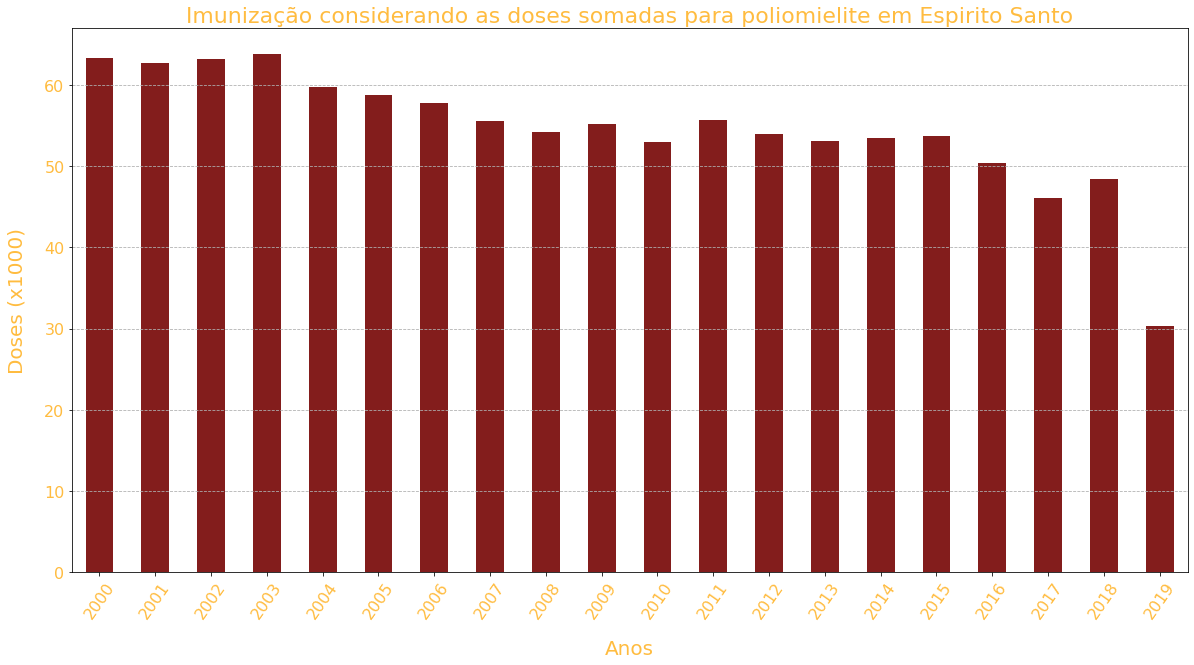

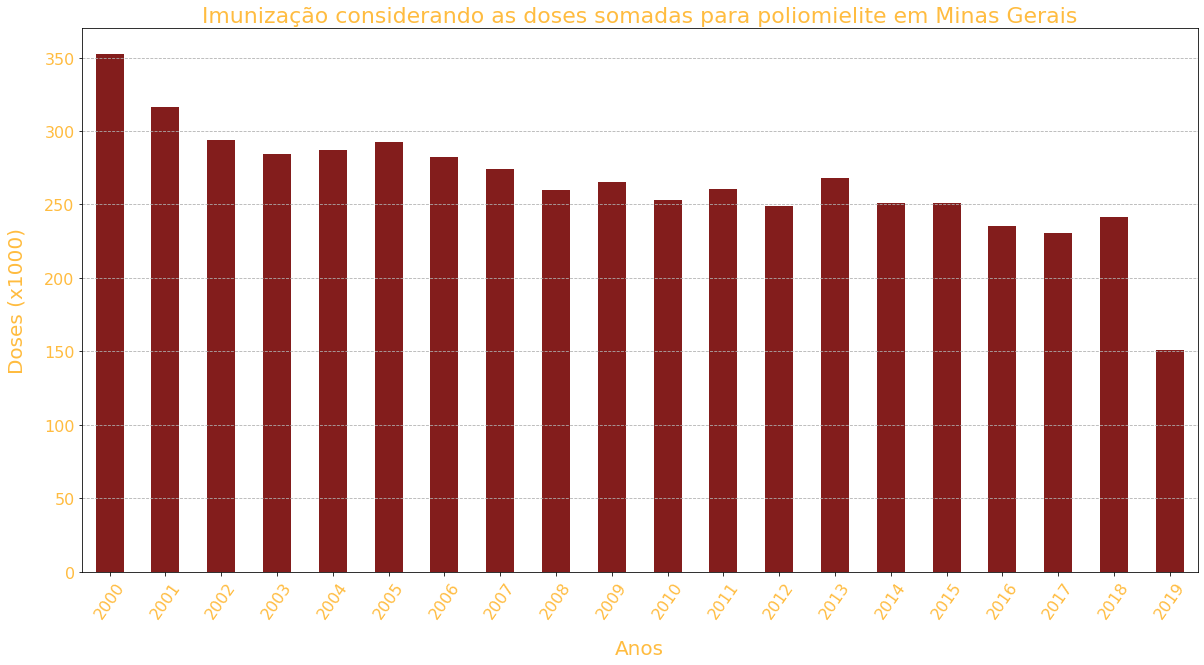

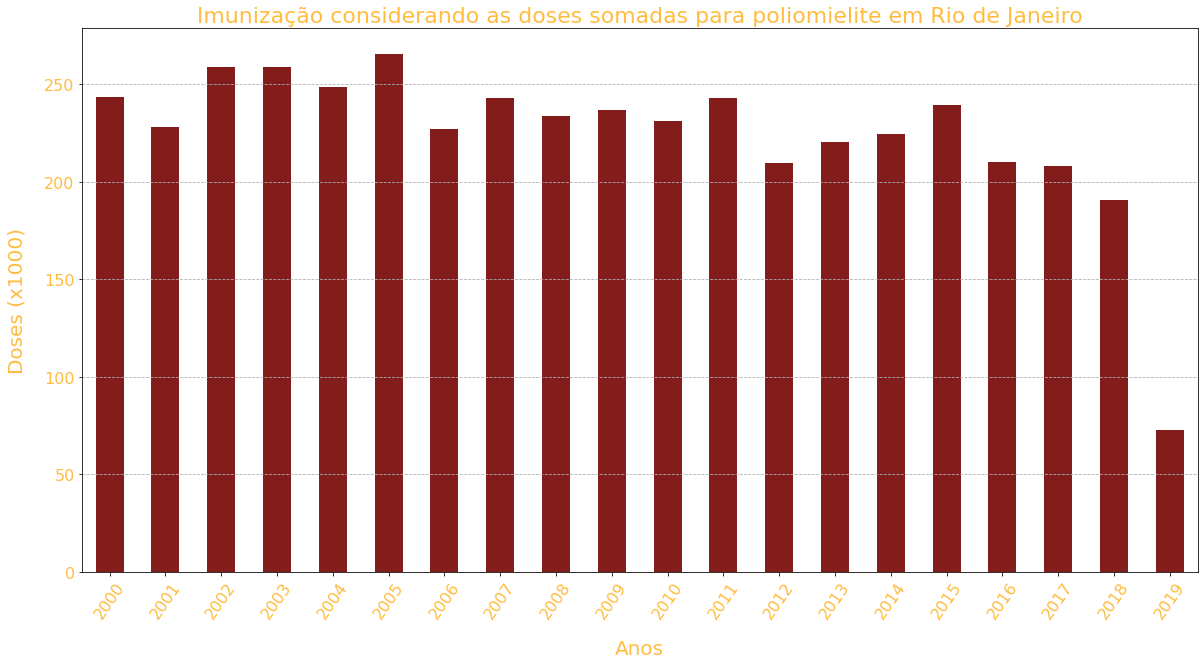

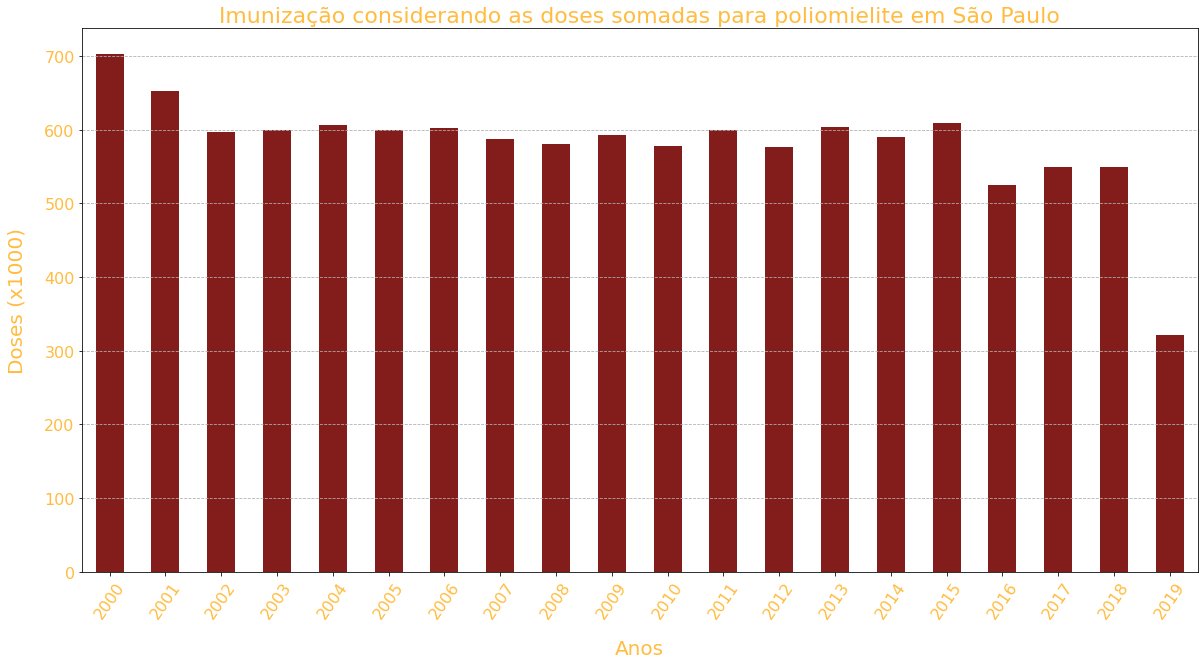

In [36]:
for uf in estados:
    plot_total_doses(uf, 'poliomielite',"#ffbc40", '#831d1c')

#### - Gráfico de imunização para Poliomielite com as doses somadas, comparativos entre os estados. 

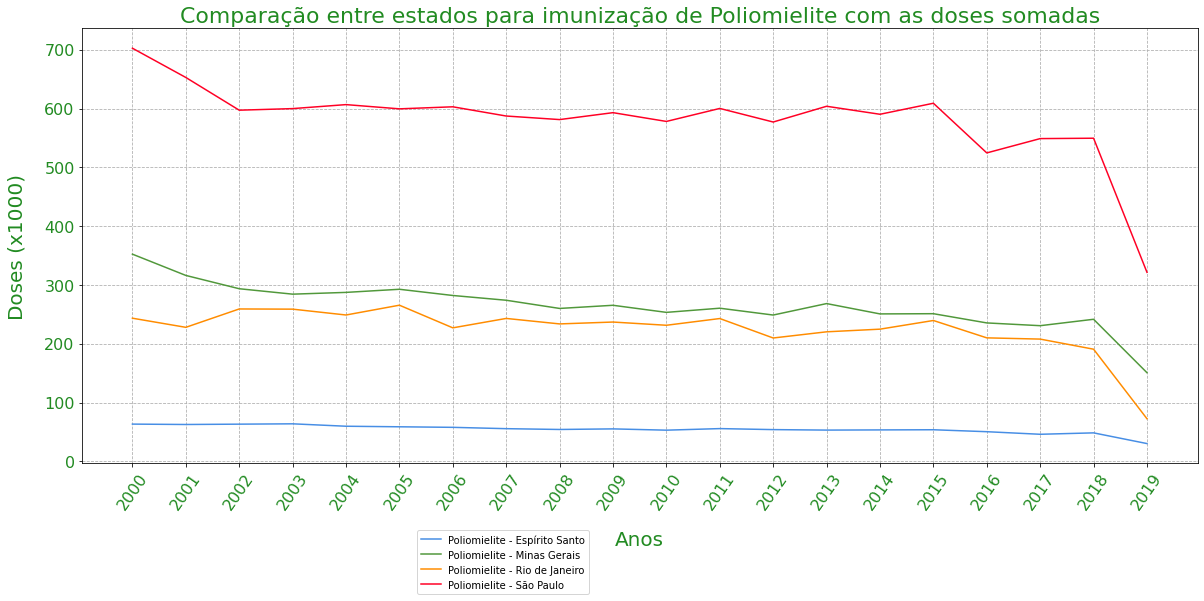

In [37]:
plot_doses_comparativo_estados('Poliomielite')

#### - Gráfico de imunização - doses somadas para os quatro estados do sudeste - Poliomielite

In [38]:
# Montadem da série com o total de doses para imunização de poliomielite nos quatro estados do sudeste.
doses_poliomielite = doses_ES.loc[poliomielite].sum() + doses_MG.loc[poliomielite].sum() + doses_RJ.loc[poliomielite].sum() + doses_SP.loc[poliomielite].sum()

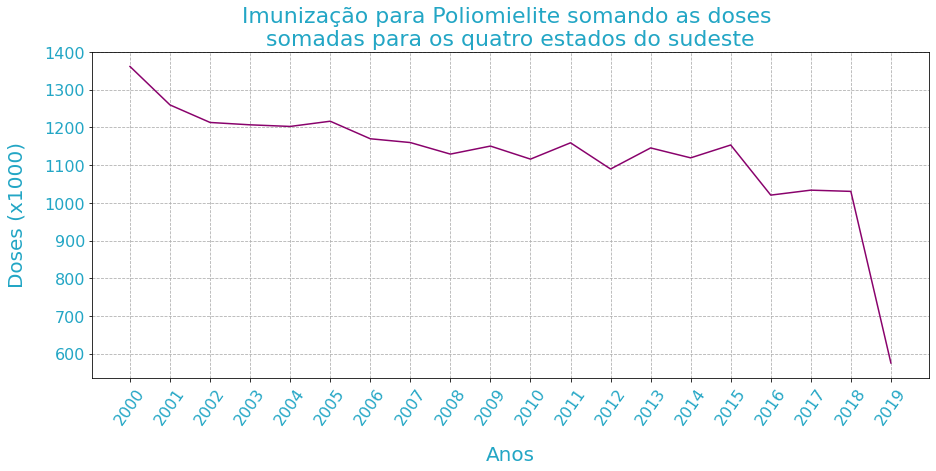

In [39]:
plt.figure(figsize=(15,6))
sns.lineplot(x = doses_poliomielite.index, y = (doses_poliomielite.values/1000), color='#89026c')
COLOR = '#23a6c5'
ax = plt.title(f'''Imunização para Poliomielite somando as doses 
somadas para os quatro estados do sudeste''', color=COLOR, fontsize=22)
ax = plt.xticks(color = COLOR, rotation = 55, fontsize=16)
ax = plt.yticks(color = COLOR, fontsize=16)
ax = plt.xlabel('Anos', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.ylabel('Doses (x1000)', color = COLOR, labelpad= 18, fontsize = 20) 
ax = plt.grid(which='both', linestyle='--')
ax = plt.show()

In [40]:
# Queda entre 2018 e 2019
f'{(doses_poliomielite.values[-1] / doses_poliomielite.values[-2])*100:.2f}%'

'55.81%'

In [41]:
# Queda em 2019 em relação a média
f'{doses_poliomielite.values[-1] / (doses_poliomielite.values.mean())*100:.2f}%'

'51.08%'

#### - Gráfico de imunização para Poliomielite considerando a taxa de cobertura, em comparação entre os estados. 

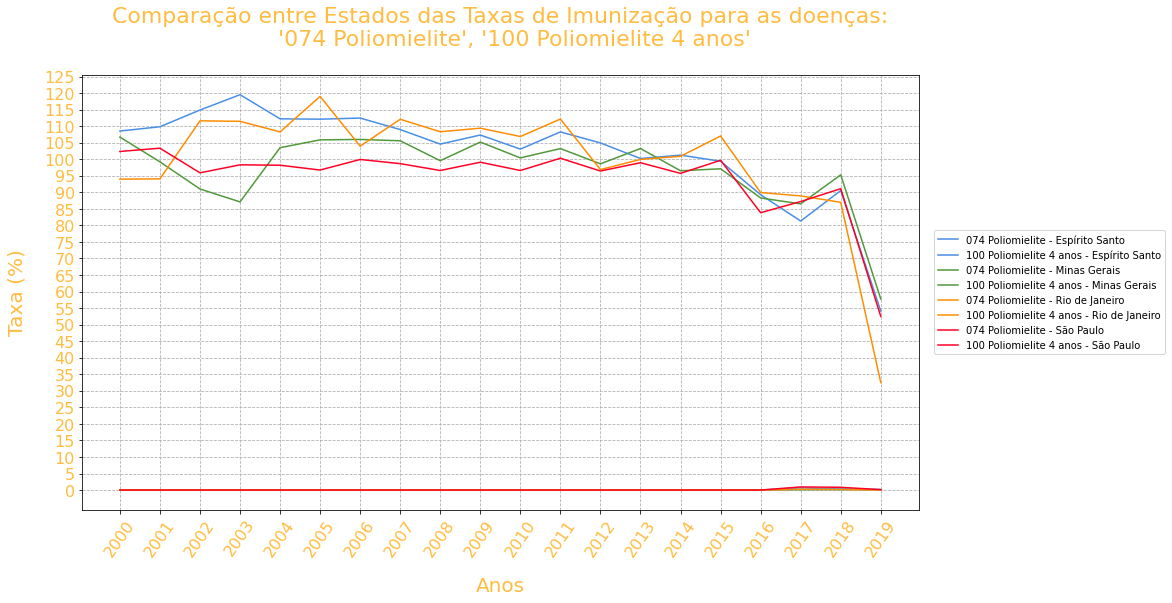

In [42]:
plot_taxa_comparativo_estados_lista(poliomielite,'#ffbc40')

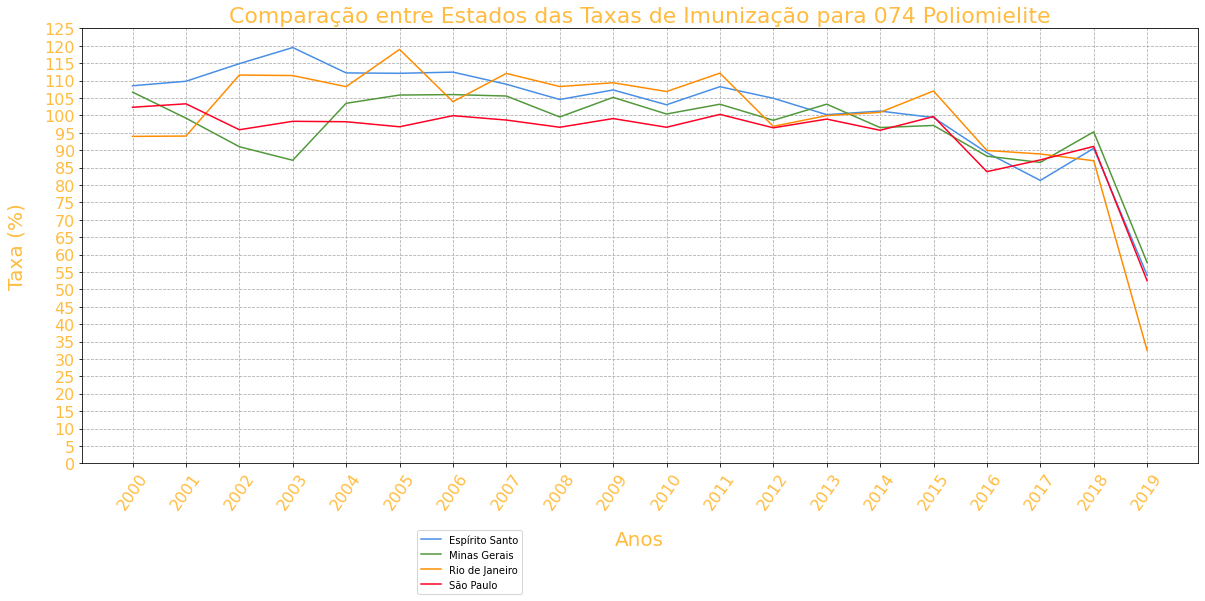

In [43]:
plot_taxa_comparativo_estados(poliomielite[0], '#ffbc40')

---
Observação: Descartaremos o imunizante '100 Poliomielite 4 anos', pois não apresenta valores adequados para análise.

#### Análise dos gráficos de imunização para POLIOMIELITE:
> Para os gráficos de "Imunização considerando as doses somadas para poliomielite" temos dois tipos de vacinas, que foram somadas para melhorar a análise, sendo elas '074 Poliomielite', '100 Poliomielite 4 anos', embora essa última seja irrelevante para análise pois, os valores são muito baixos em relação a primeira.<p>
Analisando os gráficos percebemos que em Minas Gerais, Espírito Santo e Rio de Janeiro é possível notar constante queda nos quadros anuais das doses de vacina para Poliomielite, tendo a queda mais acentuada registrada no último ano da série.<p>
No caso do estado de São Paulo, o gráfico se apresenta um pouco mais estável, com uma queda a partir de 2003 se mantendo estável até 2015, com uma forte queda em 2016, uma leve alta em 2017 e 2018, e a maior queda da série em 2019.<p>
Se analisarmos utilizando o gráfico de "Comparação entre estados para imunização de Poliomielite com as doses somadas" verificamos que salvo as proporções populacionais, já que os estados mais populosos tem curvas com maior distribuição de doses, podemos verificar variações bastante similares entre as curvas, o que indica ação coordenada, pelo menos no caráter regional.<p>
Também podemos verificar através do "Imunização para Poliomielite somando as doses somadas para os quatro estados do sudeste", onde somamos todos os valores dessa tipagem em uma única série.<p>
Nela a média de doses anuais dos 4 estados somados é de 1.125.631 doses, a queda de aplicação para o último ano (2019) em relação à média é de 51%, se calcularmos em relação ao ano de 2018 a queda é ainda maior chegando a 55%.<p>
Com base nessa análise, realmente devemos nos preocupar, pois a imunização aparenta realmente uma forte queda.<p>
Para eliminarmos os fatores demográficos e populacionais, e melhorarmos a qualidade da nossa análise, montamos os modelos onde vemos as comparações e análises utilizando como base de dados, os valores retirados das taxas de cobertura vacianal, esses dados são uma relação entre a quantidade de doses inoculadas em relação ao público que se desejava imunizar.<p>
No gráfico "Comparação entre Estados das Taxas de Imunização para 074 Poliomielite" podemos notar que entre 2000 e 2015 a cobertura vacinal se mantém em um ótimo patamar, acima de 95%, o preocupante é que desde 2016 esse indice vem caindo, o que pode indicar fatores complicadores num futuro próximo, pois essa [doença é muito grave](https://www.minhavida.com.br/saude/temas/poliomielite#:~:text=Poliomielite%20%C3%A9%20uma%20doen%C3%A7a%20viral,afetar%20tanto%20crian%C3%A7as%20quanto%20adultos.), e pode afetar a pessoa por toda sua vida.<p>




>**Fonte:**<p>
- https://www.minhavida.com.br/saude/temas/poliomielite#:~:text=Poliomielite%20%C3%A9%20uma%20doen%C3%A7a%20viral,afetar%20tanto%20crian%C3%A7as%20quanto%20adultos.<p>

#### - Gráficos para comparação da taxa de cobertura vacinal para todas as doenças imunizáveis pelo programa nacional de imunização:
Para essa análise, retiramos os dados do Observatório da Criança e do Adolescente.

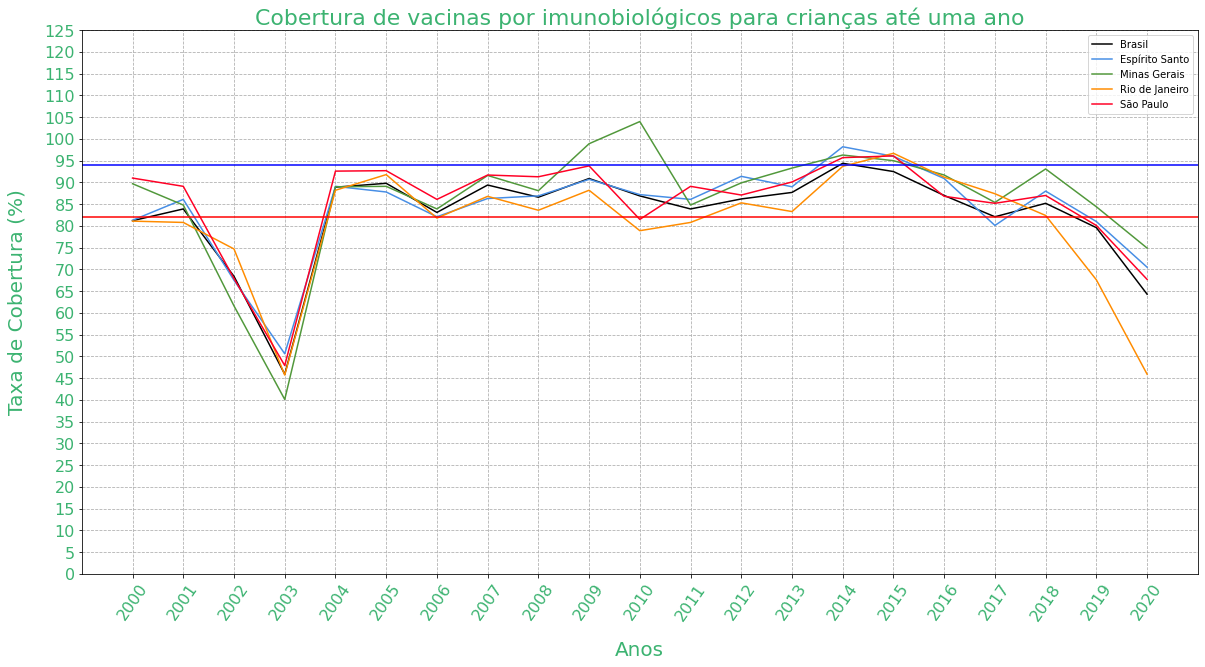

Localidade,Brasil,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,82.757143,86.171429,84.133333,80.757143,85.261905
std,11.048148,13.660056,10.516432,13.305058,11.463484
min,45.900000,40.100000,50.600000,45.700000,47.900000
25%,82.100000,84.800000,81.300000,80.800000,85.200000
50%,86.200000,89.100000,86.900000,83.300000,89.100000
75%,88.900000,93.100000,89.100000,88.200000,91.700000
max,94.400000,104.000000,98.200000,96.700000,96.100000


In [44]:
plt.figure(figsize=(20,10))
sns.lineplot(x = cobertura1ano.T.index, y = cobertura1ano.T['Brasil'].values, color='black', label='Brasil')
sns.lineplot(x = cobertura1ano.T.index, y = cobertura1ano.T['Espírito Santo'].values, color=AZUL, label='Espírito Santo')
sns.lineplot(x = cobertura1ano.T.index, y = cobertura1ano.T['Minas Gerais'].values, color=VERDE, label='Minas Gerais')
sns.lineplot(x = cobertura1ano.T.index, y = cobertura1ano.T['Rio de Janeiro'].values, color=LARANJA, label='Rio de Janeiro')
sns.lineplot(x = cobertura1ano.T.index, y = cobertura1ano.T['São Paulo'].values, color=VERMELHO, label='São Paulo')
COLOR = '#3cb371'
ax = plt.title(f'''Cobertura de vacinas por imunobiológicos para crianças até uma ano''', color=COLOR, fontsize=22)
ax = plt.xticks((np.arange(2000,2021,1)), color = COLOR, rotation = 55, fontsize=16)
ax = plt.yticks((np.arange(0,130,5)),color = COLOR, fontsize=16)
ax = plt.xlabel('Anos', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.ylabel('Taxa de Cobertura (%)', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.axhline(y=82, color='r', linestyle='-')
ax = plt.axhline(y=94, color='b', linestyle='-') 
ax = plt.grid(which='both', linestyle='--')
ax = plt.show()
cobertura1ano.T.describe()

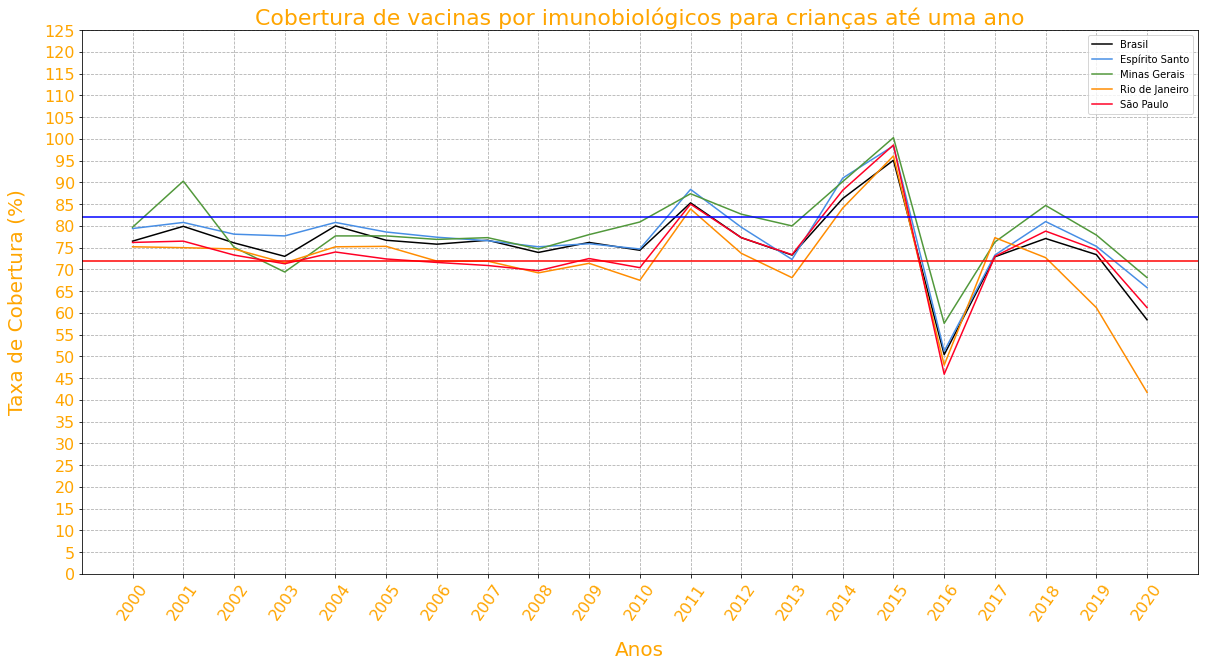

Localidade,Brasil,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,75.652381,79.185714,77.695238,71.695238,74.033333
std,8.930376,8.805526,9.153605,11.403222,9.968116
min,50.400000,57.600000,51.200000,41.700000,45.900000
25%,73.400000,76.300000,75.200000,69.200000,71.300000
50%,76.200000,77.900000,77.700000,72.700000,73.300000
75%,77.300000,82.700000,80.800000,75.200000,76.500000
max,95.100000,100.300000,98.400000,96.100000,98.600000


In [45]:
plt.figure(figsize=(20,10))
sns.lineplot(x = cobertura_total.T.index, y = cobertura_total.T['Brasil'].values, color='black', label='Brasil')
sns.lineplot(x = cobertura_total.T.index, y = cobertura_total.T['Espírito Santo'].values, color=AZUL, label='Espírito Santo')
sns.lineplot(x = cobertura_total.T.index, y = cobertura_total.T['Minas Gerais'].values, color=VERDE, label='Minas Gerais')
sns.lineplot(x = cobertura_total.T.index, y = cobertura_total.T['Rio de Janeiro'].values, color=LARANJA, label='Rio de Janeiro')
sns.lineplot(x = cobertura_total.T.index, y = cobertura_total.T['São Paulo'].values, color=VERMELHO, label='São Paulo')
COLOR = '#ffa500'
ax = plt.title(f'''Cobertura de vacinas por imunobiológicos para crianças até uma ano''', color=COLOR, fontsize=22)
ax = plt.xticks((np.arange(2000,2021,1)), color = COLOR, rotation = 55, fontsize=16)
ax = plt.yticks((np.arange(0,130,5)),color = COLOR, fontsize=16)
ax = plt.xlabel('Anos', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.ylabel('Taxa de Cobertura (%)', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.axhline(y=72, color='r', linestyle='-')
ax = plt.axhline(y=82, color='b', linestyle='-') 
ax = plt.grid(which='both', linestyle='--')
ax = plt.show()
cobertura_total.T.describe()

## Conclusão:
Para esses dois últimos gráficos, "Cobertura de vacinas por imunobiológicos para crianças até uma ano" e "Cobertura de vacinas por imunobiológicos sobre a população total", utilizamos os [dados o Observatório da Criança e do Adolescente](https://observatoriocrianca.org.br/cenario-infancia/temas/sobrevivencia-infantil-infancia/637-cobertura-de-vacinas-por-imunobiologicos?filters=1,2033). Esses dados também foram retirados do SI-PNI do DATA/SUS, mas estão agrupados de outra maneira.<p>
Achei que para finalizarmos nossa análise, esses dados nós trariam uma visão mais global do programa nacional de imunização.
Podemos reparar no gráfico que considera somente as crianças pequenas, que as médias são muito boas acima de 80%, tanto no plano nacional, quanto nos estados do sudeste, escolhidos para nossa análise. Temos que nos ater infelizmente as quedas nas taxas entre 2013 e 2020.<p>
Já o gráfico que considera a população total, as médias são um pouco menores, acima de 74%, até porque as pessoas perdem um pouco o controle sobre a situação vacinal pessoal com o passar do tempo, e só se atentam a isso, quando por necessidade de alguma viagem, concurso público ou atividades que emanem a necessidade de regularização imunológica.<p>
Analiticamente podemos destacar possíveis falhas de atualização dos dados nos sistemas do SUS em todos os gráficos, a partir de 2019, pois a queda foge muito da média e acredito que se refizermos esses mesmos levantamentos daqui um ou dois anos, os valores devem aumentar um pouco.<p>
Nessa útlima classe de gráficos podemos visualizar dois pontos que fogem bastante da curva, e que provavelmente evidenciam alguma falha na coleta dos dados, no primeiro, no ano de 2003 e no segundo, no ano de 2016.<p>
Eu acredito que para que possamos ter bons resultados, devemos considerar os dados dos últimos 5 anos, descartando o último, e assim termos uma boa média para análise.<p>
Em um quadro geral, os dados são bastante preocupantes, efetivamente, é possível notar quedas efetivas nos quadros de Sarampo e Poliomielite, doenças que podem causar graves consequências, inclusive a morte.<p>
No caso da Febre Amarela, o preocupante, é que mesmo com um quadro complicado de epidemia, os índices esperados pelo programa nacional de imunização ficou abaixo dos 75% nos três estados com excessão de Minas Gerais.<p>
Para Poliomielite, as curvas dos quatro estados mostraram tendência de forte queda nas taxas de cobertura a partir de 2014, o que realmente é muito preocupante, mesmo assim os dados oscilam acima dos 80%.<p>
Para a cobertura de Sarampo, as taxas são ainda melhores acima do 90%, mesmo assim existe uma sutil variação decrescente entre 2014 e 2018, e é importante observar que existe um aparente abandono de imunização, onde as crianças tomam as primeiras doses, mas não tomam os reforços.<p>
Eu achei que seria mais fácil vizualizar as tendências negacionistas para vacinas atualmente, mas os dados que temos ainda são muito recentes, contudo gostaria de deixar um alerta, a vacinação é segura e eficaz, e reduz a taxa de mortalidade infantil. Espero estar errado, mas se refizermos essa análise daqui um ou dois anos, principalmente após a pandemia, acredito que veremos índices em quedas mais fortes.<p>
